In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import chi2
from sklearn.covariance import MinCovDet
from sklearn.ensemble import IsolationForest

In [3]:
df = pd.read_csv("D:/A/4th year notes/ST 4052 - Statistical Learning II/dermatology_database_1.csv")
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

**Handling missing values**

In [5]:
df.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [6]:
# Function to count question marks in each column
def count_question_marks(column):
    return column.apply(lambda x: str(x).count('?')).sum()

# Applying the function to each column
question_marks_count = df.apply(count_question_marks)

print(question_marks_count)

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [7]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Check summary statistics, ignoring NaN values
mean_age = df['age'].mean()
median_age = df['age'].median()

# Print mean and median to help decide
print(f"Mean age: {mean_age}")
print(f"Median age: {median_age}")

Mean age: 36.29608938547486
Median age: 35.0


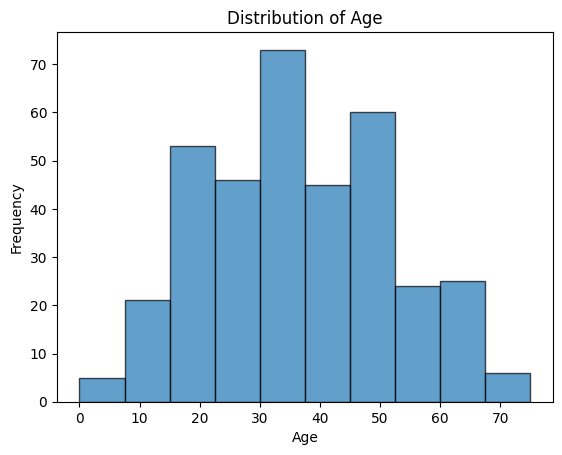

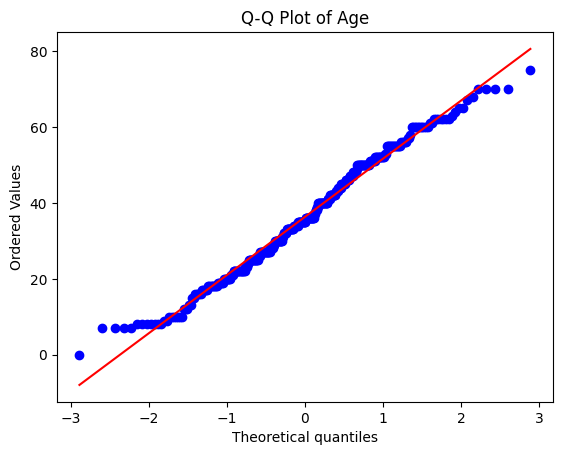

Shapiro-Wilk Test p-value: 0.002013148408140595


In [8]:
age_data = df['age'].dropna()
import scipy.stats as stats

# Plot histogram
plt.hist(age_data, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Q-Q Plot
stats.probplot(age_data, dist="norm", plot=plt)
plt.title('Q-Q Plot of Age')
plt.show()

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(age_data)
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")


Since the p value is less than 0.05 data is significantly different from a normal distribution. Hence median can be used to impute the ? marks in age.

In [9]:
# Replace NaN values with the median
df['age'].fillna(median_age, inplace=True)

# Convert to int64 if required
df['age'] = df['age'].astype('int64')

In [10]:
categorical_columns = [col for col in df.columns if col != 'age']

# Convert specified columns to categorical
df[categorical_columns] = df[categorical_columns].astype('category')

In [11]:
print(df.dtypes)

erythema                               category
scaling                                category
definite_borders                       category
itching                                category
koebner_phenomenon                     category
polygonal_papules                      category
follicular_papules                     category
oral_mucosal_involvement               category
knee_and_elbow_involvement             category
scalp_involvement                      category
family_history                         category
melanin_incontinence                   category
eosinophils_infiltrate                 category
PNL_infiltrate                         category
fibrosis_papillary_dermis              category
exocytosis                             category
acanthosis                             category
hyperkeratosis                         category
parakeratosis                          category
clubbing_rete_ridges                   category
elongation_rete_ridges                 c

In [12]:
question_marks_count = df.apply(count_question_marks)

print(question_marks_count)

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [13]:
#Check the data types of each column
df.dtypes

erythema                               category
scaling                                category
definite_borders                       category
itching                                category
koebner_phenomenon                     category
polygonal_papules                      category
follicular_papules                     category
oral_mucosal_involvement               category
knee_and_elbow_involvement             category
scalp_involvement                      category
family_history                         category
melanin_incontinence                   category
eosinophils_infiltrate                 category
PNL_infiltrate                         category
fibrosis_papillary_dermis              category
exocytosis                             category
acanthosis                             category
hyperkeratosis                         category
parakeratosis                          category
clubbing_rete_ridges                   category
elongation_rete_ridges                 c

In [14]:
df.shape

(366, 35)

In [15]:
#Check for duplicates in the entire DataFrame
duplicate_rows = df[df.duplicated()]
num_duplicates = duplicate_rows.shape[0]

print(f"Number of duplicate rows found: {num_duplicates}")

Number of duplicate rows found: 0


**Splitting the data to train and test**

In [16]:
#Features (all columns except the target column)
X = df.drop(columns=['class'])
#Target variable
y = df['class']

#Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Print the shapes of the resulting datasets to verify the split
print("Training set - Features shape:", X_train.shape, " Target shape:", y_train.shape)
print("Testing set - Features shape:", X_test.shape, " Target shape:", y_test.shape)

Training set - Features shape: (292, 34)  Target shape: (292,)
Testing set - Features shape: (74, 34)  Target shape: (74,)


**EDA**

In [17]:
# Define color mapping
unique_classes = [1, 2, 3, 4, 5, 6]
colors = plt.get_cmap('tab10').colors  # Get colors from 'tab10' colormap

# Ensure there are enough colors for the number of classes
color_mapping = {cls: colors[i % len(colors)] for i, cls in enumerate(unique_classes)}

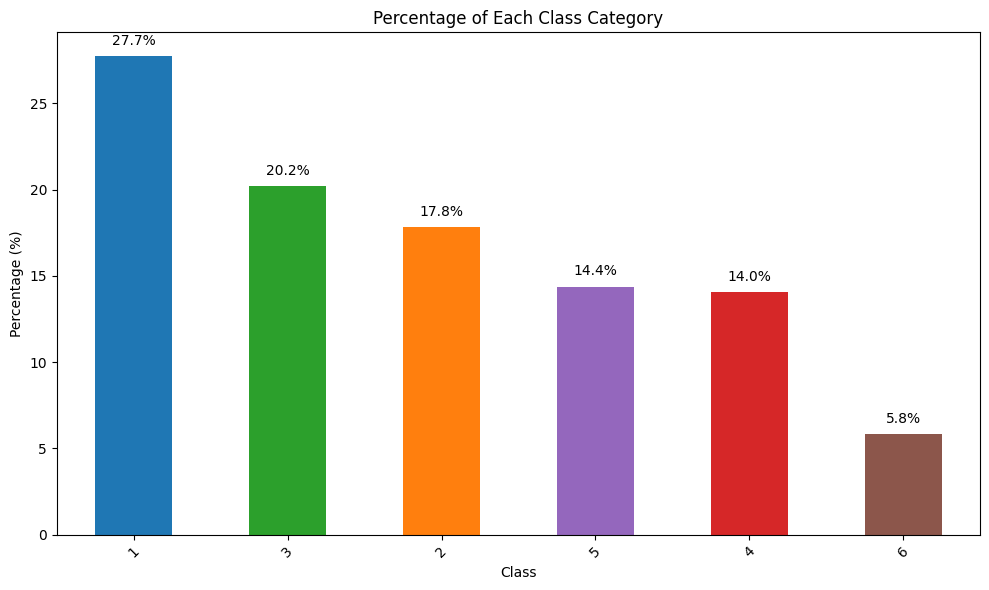

In [18]:
# Calculate the value counts and convert to percentages
class_counts = y_train.value_counts(normalize=True) * 100

# Plotting the percentage bar chart with different colors
plt.figure(figsize=(10, 6))

# Plot the bar chart
bars = class_counts.plot(kind='bar', color=[color_mapping[cls] for cls in class_counts.index])

# Annotate each bar with its percentage value
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xlabel('Class')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Each Class Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


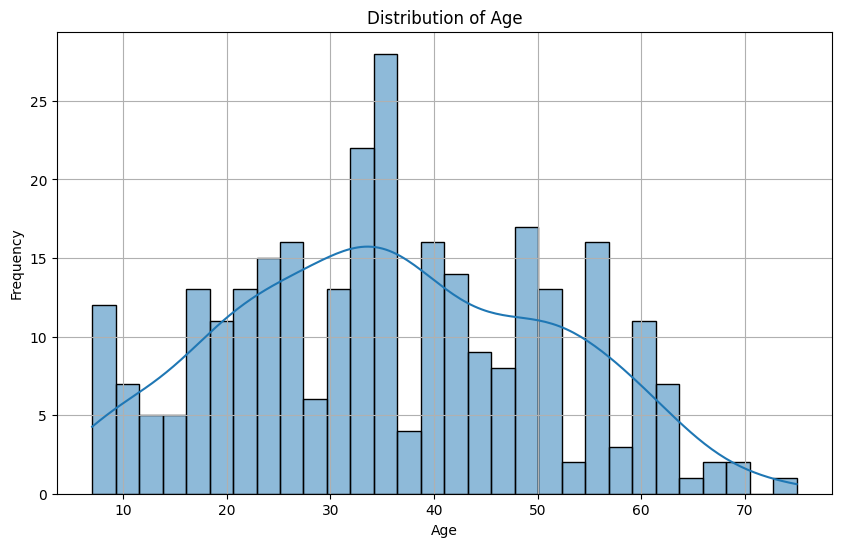

In [19]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(X_train['age'], kde=True, bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid()
plt.show()

In [20]:
# Summary statistics of 'age' in the training set
age_summary = X_train['age'].describe()
print(age_summary)

count    292.000000
mean      35.791096
std       15.270556
min        7.000000
25%       25.000000
50%       35.000000
75%       48.000000
max       75.000000
Name: age, dtype: float64


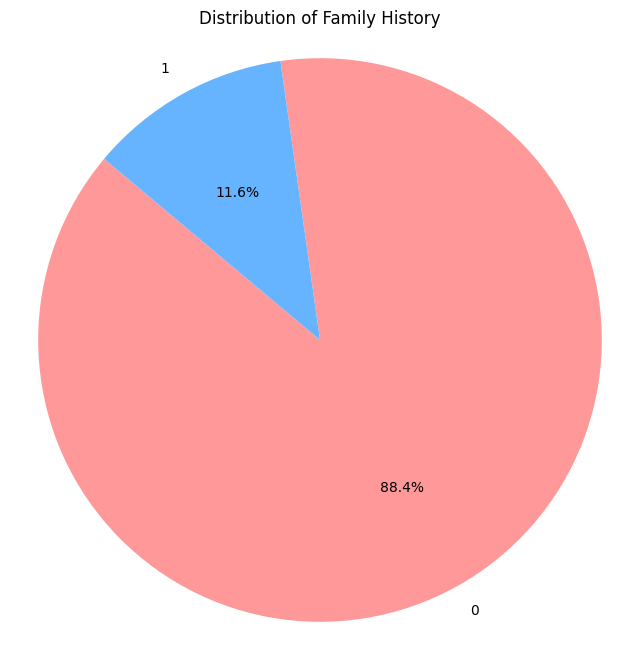

In [21]:
# Plot the distribution of 'family_history' in the training set
family_history_counts = X_train['family_history'].value_counts()
labels = family_history_counts.index
sizes = family_history_counts.values
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Family History')
plt.axis('equal')
plt.show()

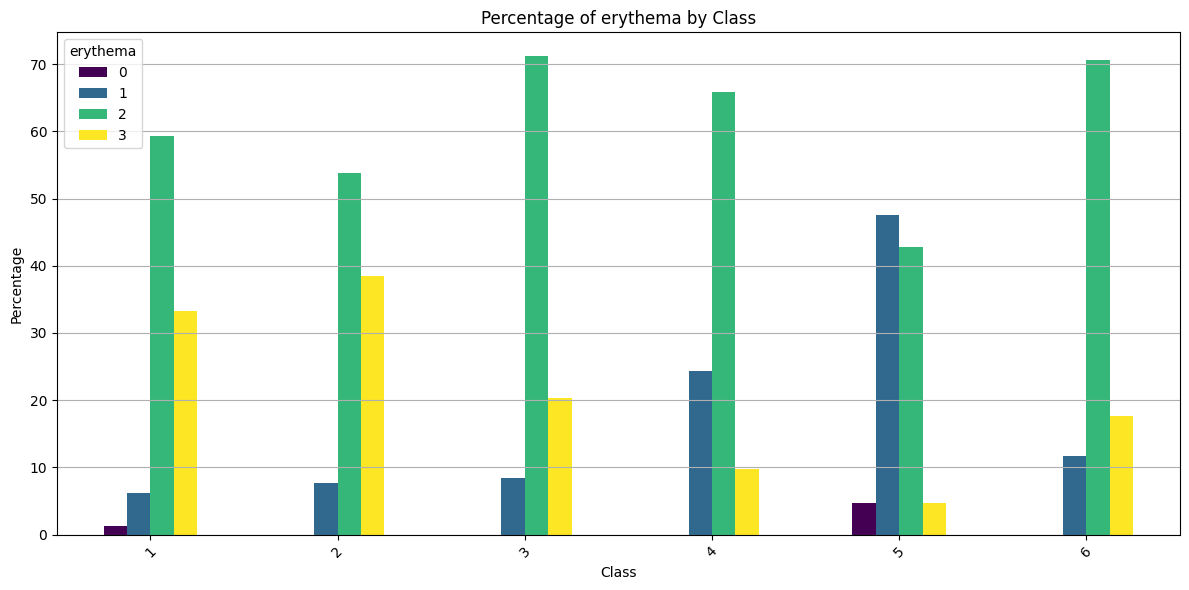

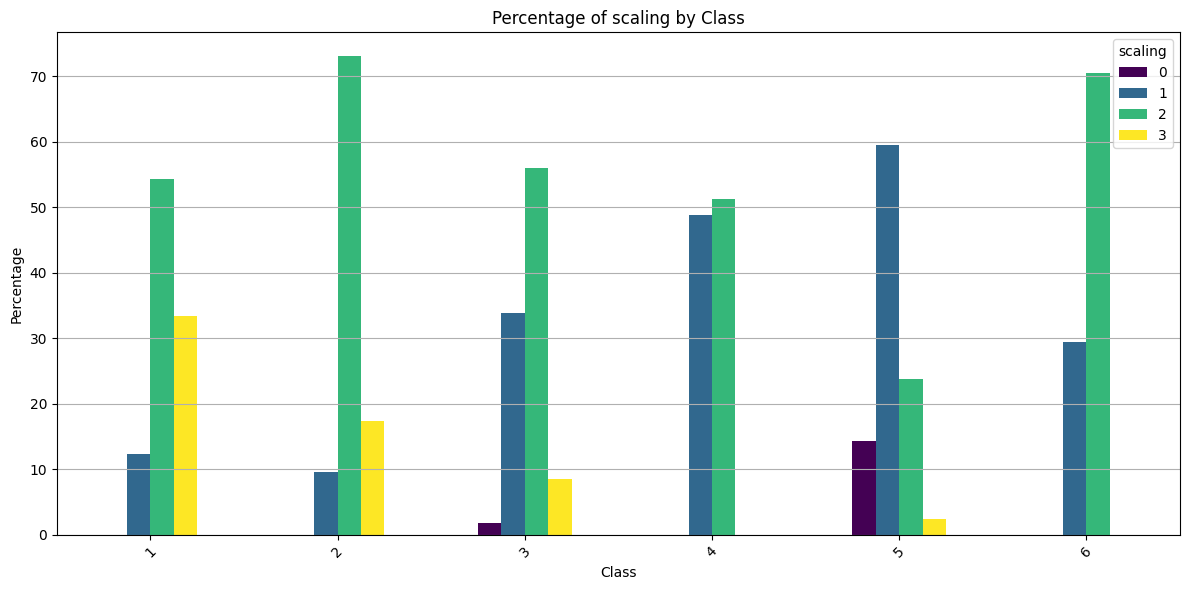

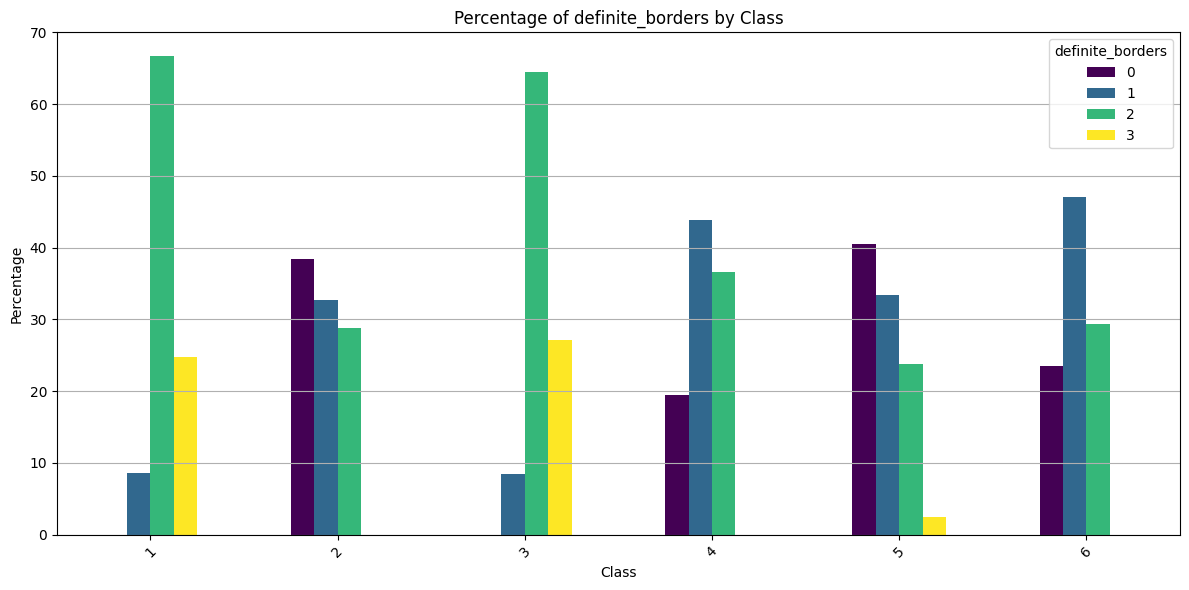

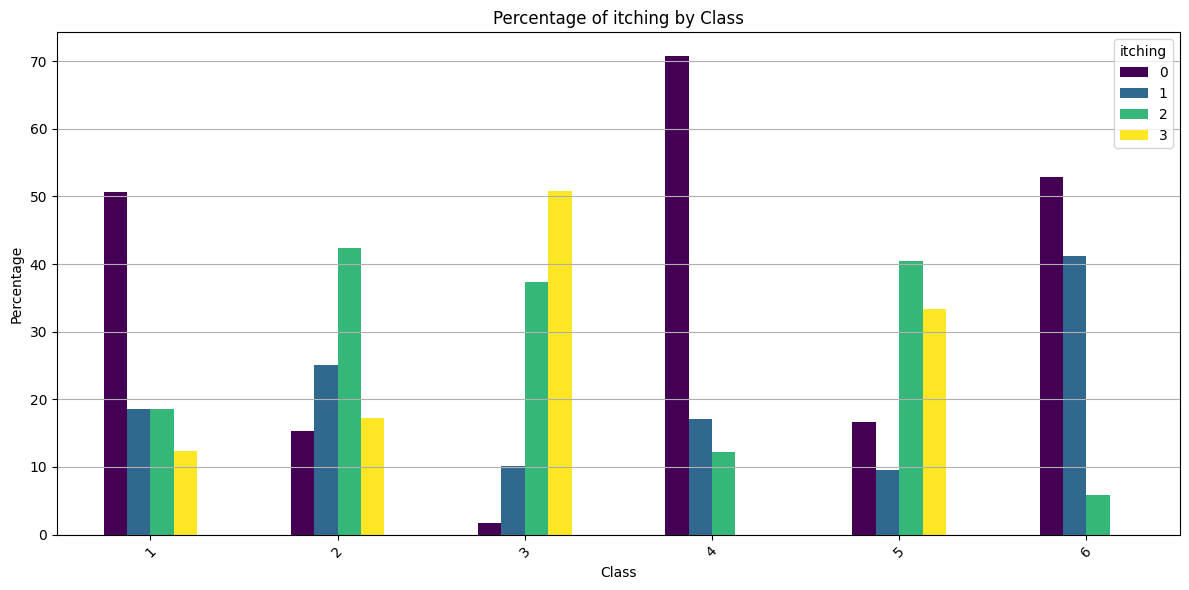

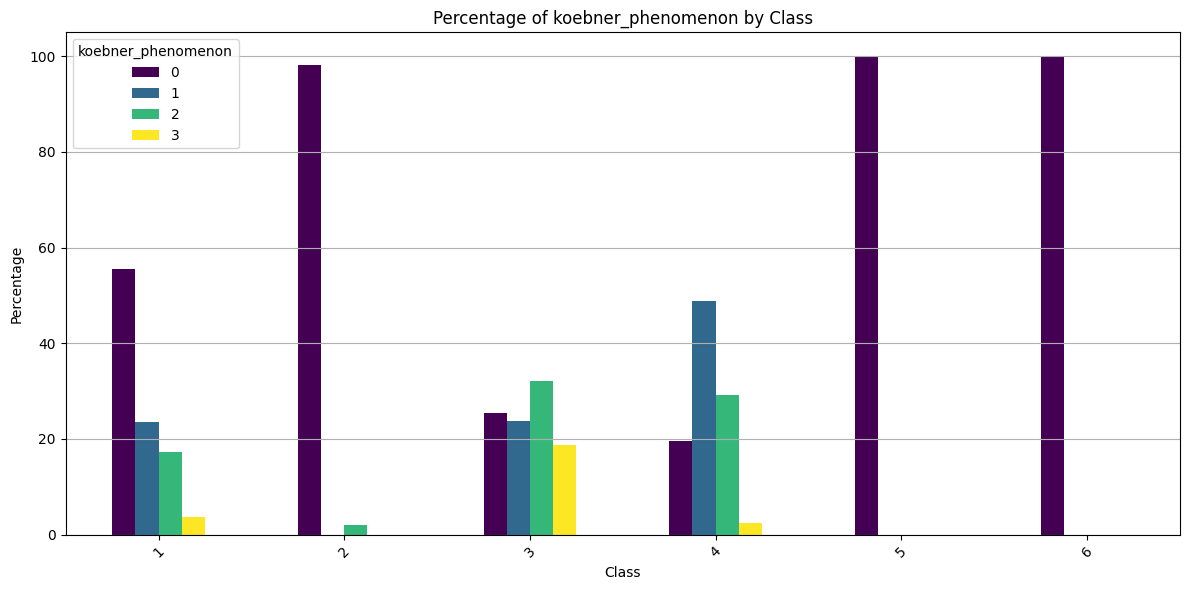

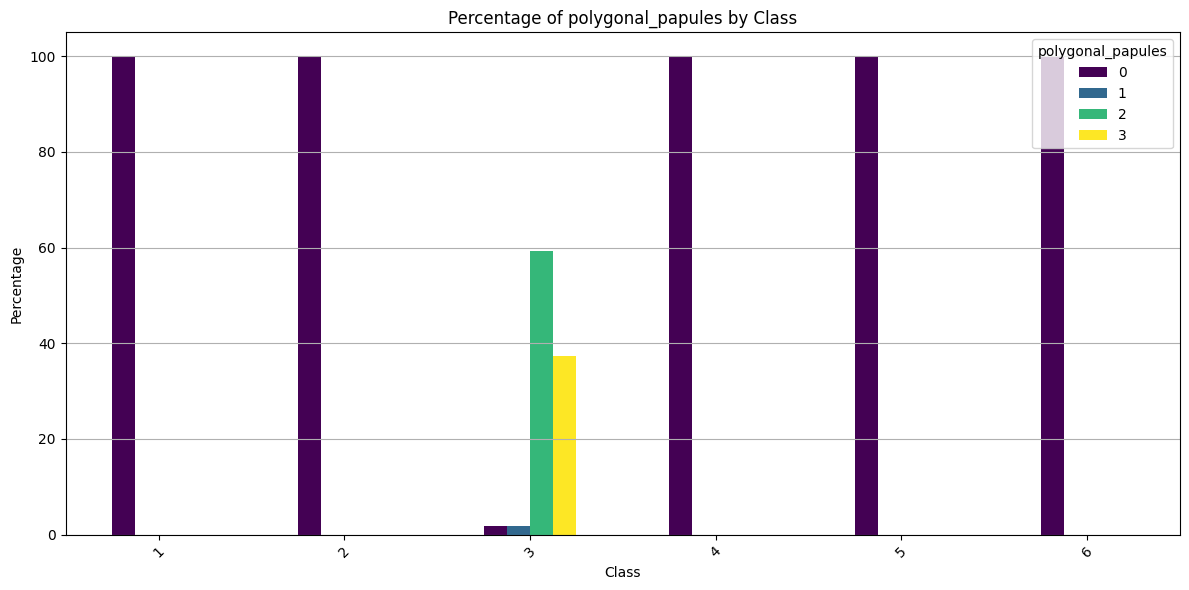

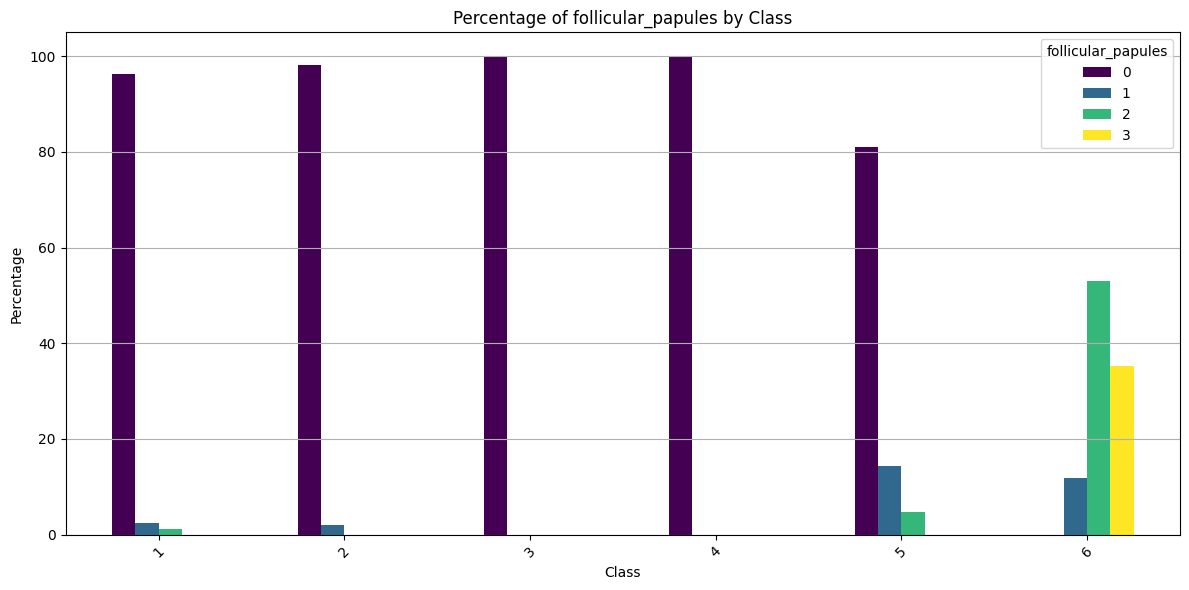

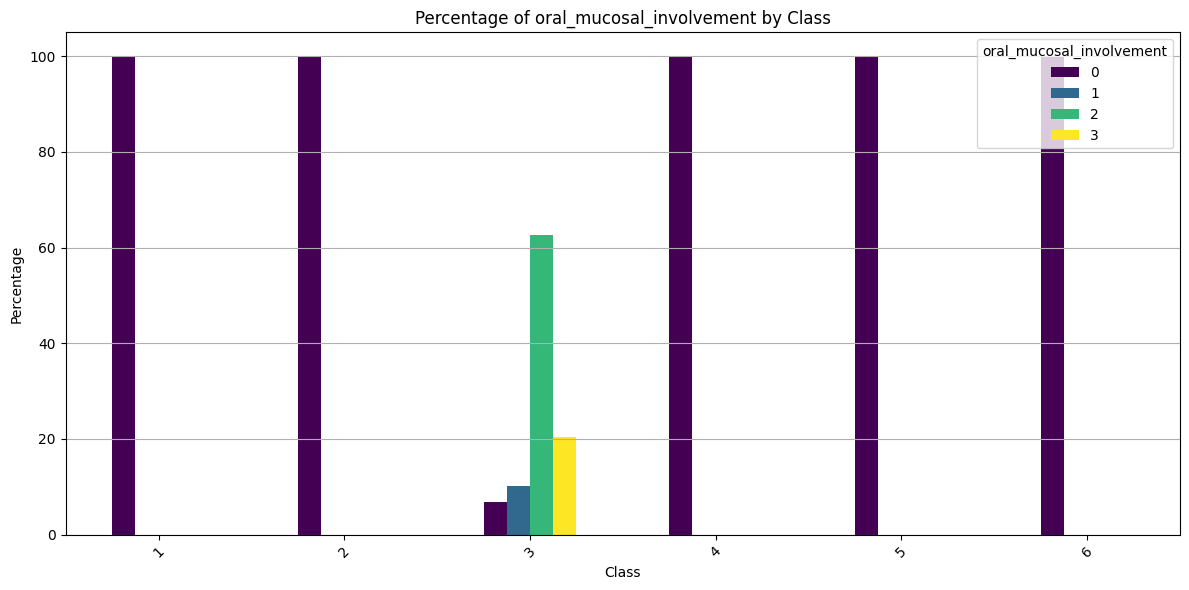

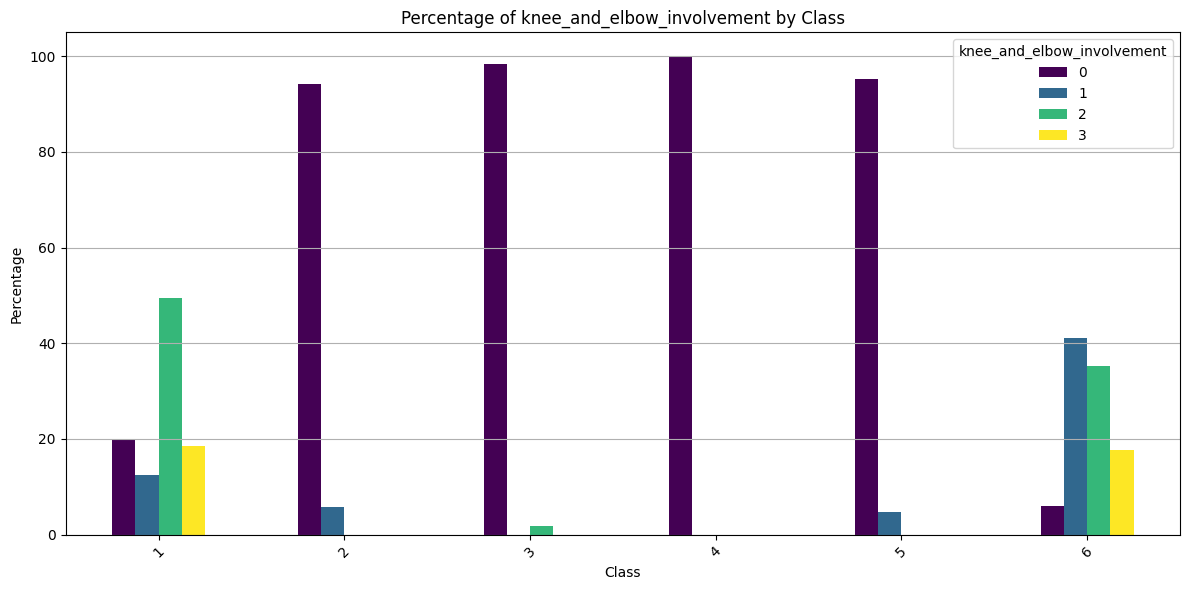

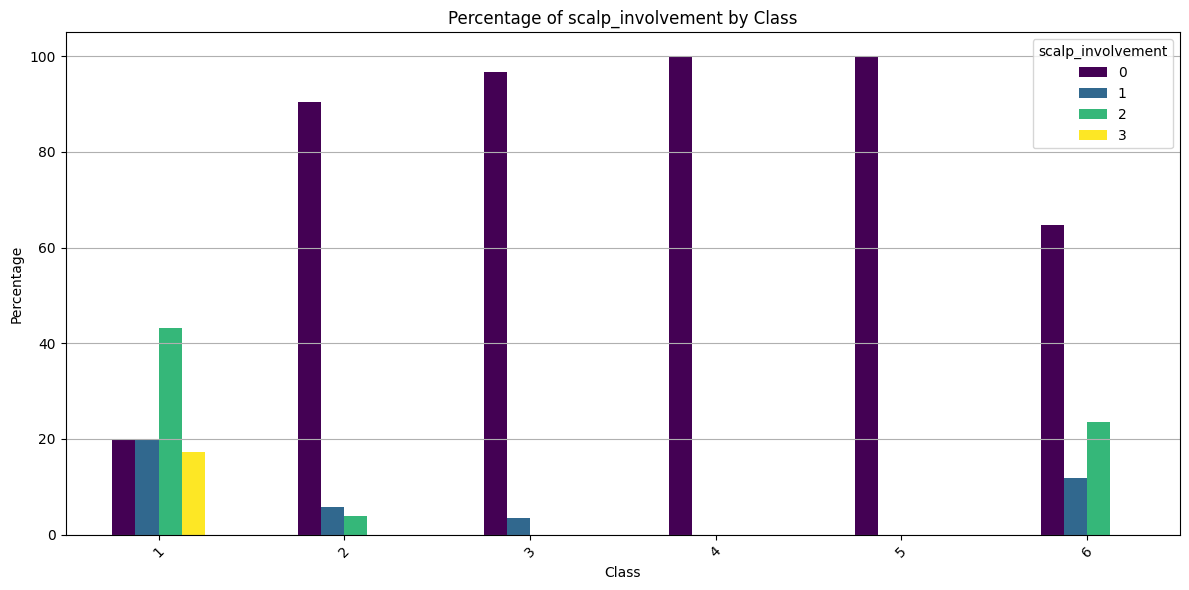

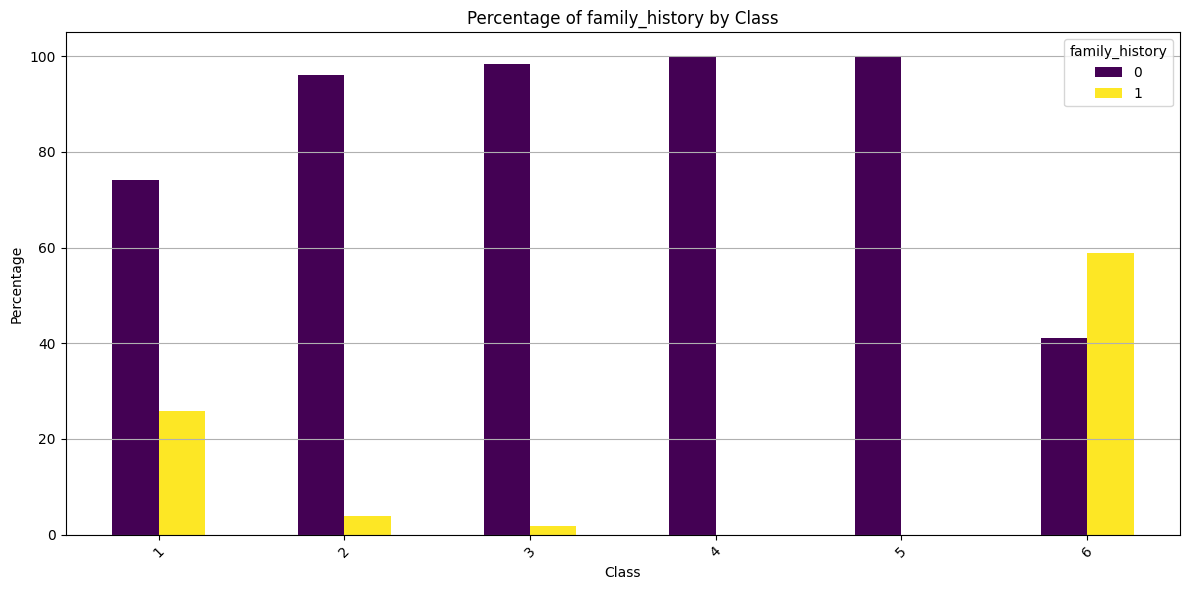

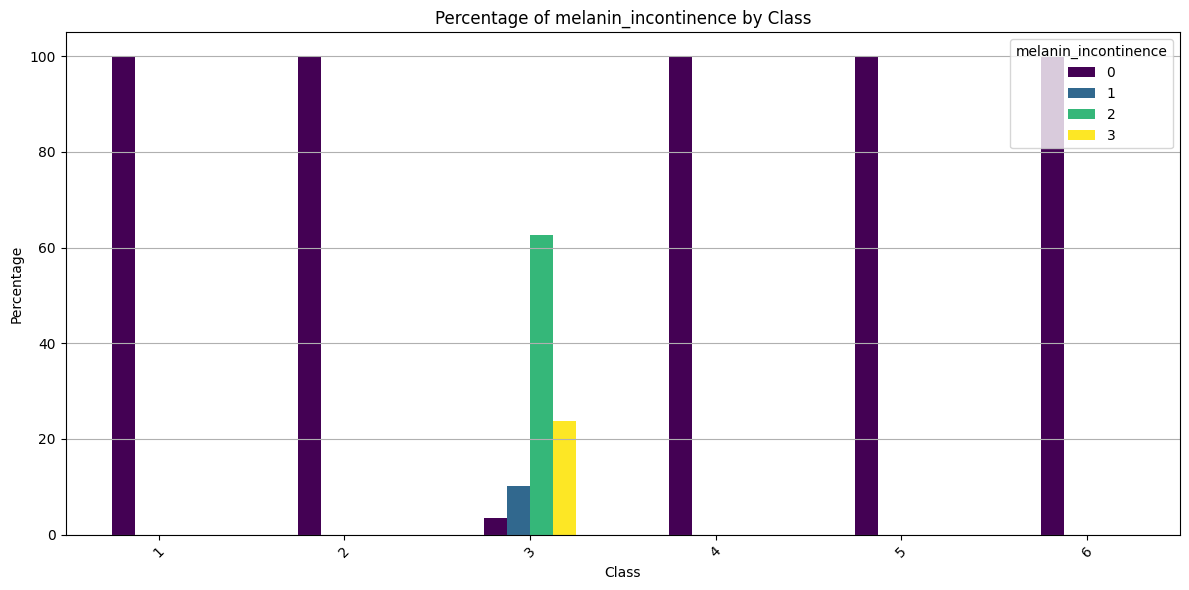

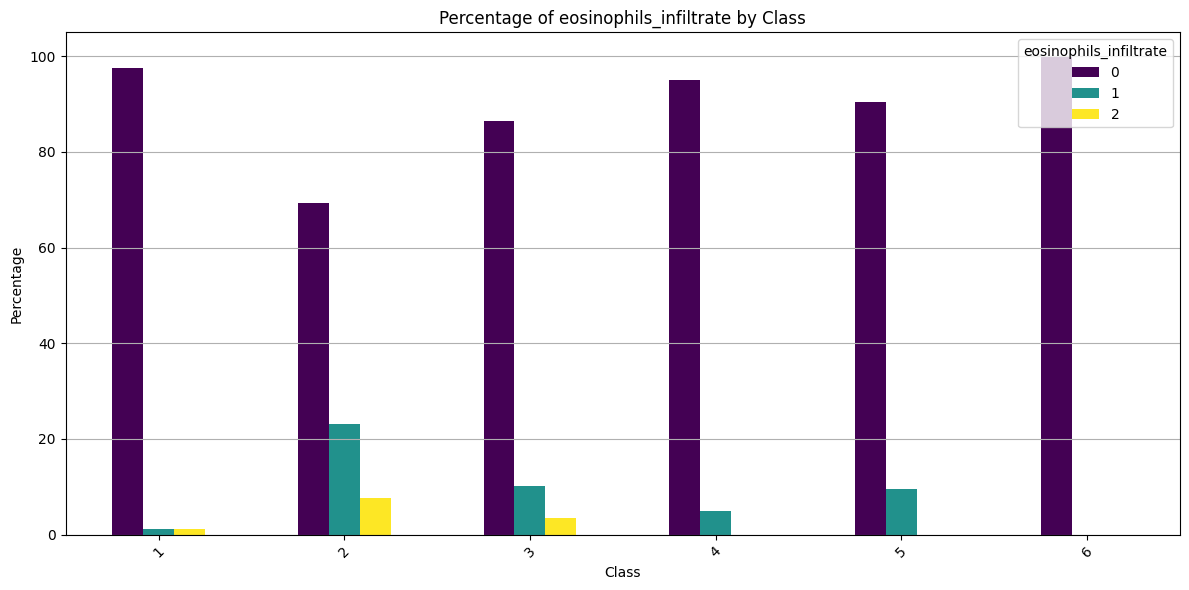

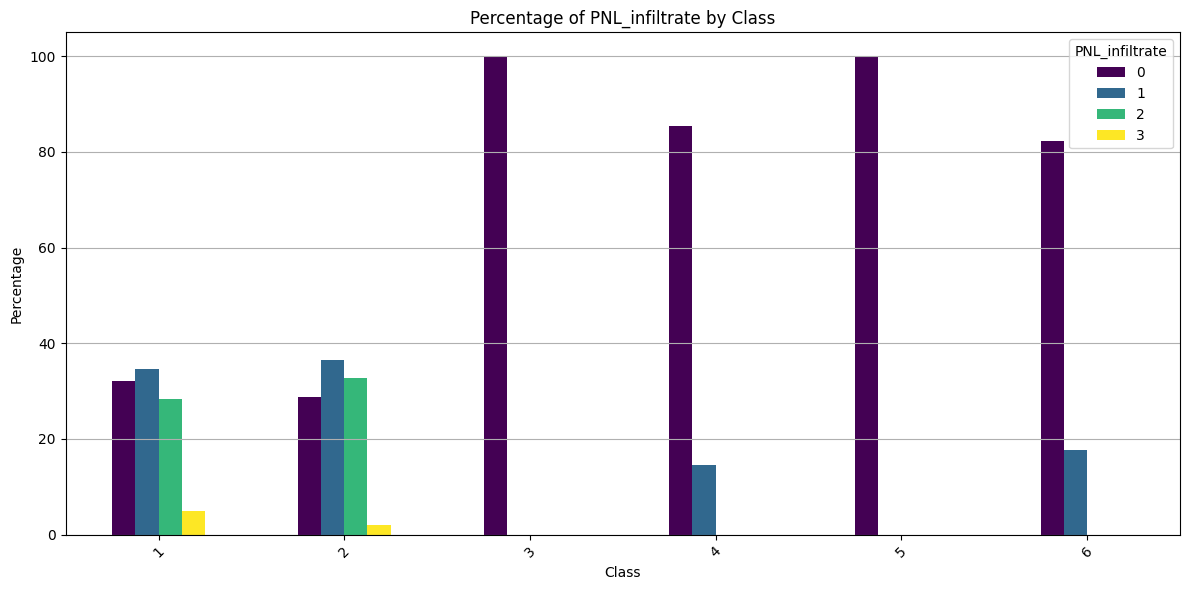

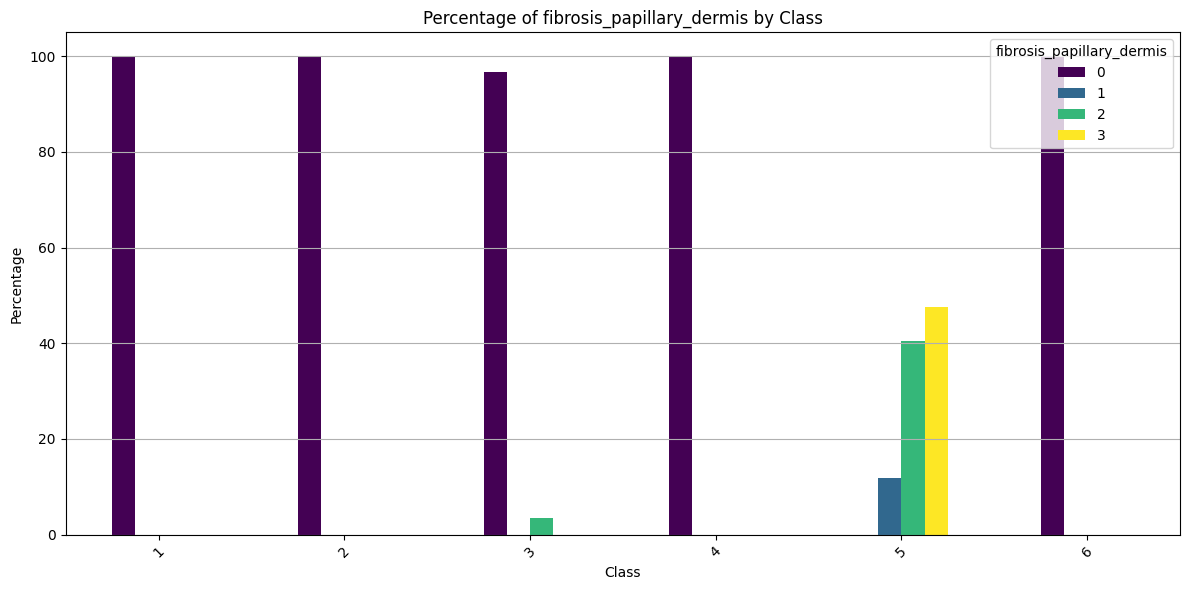

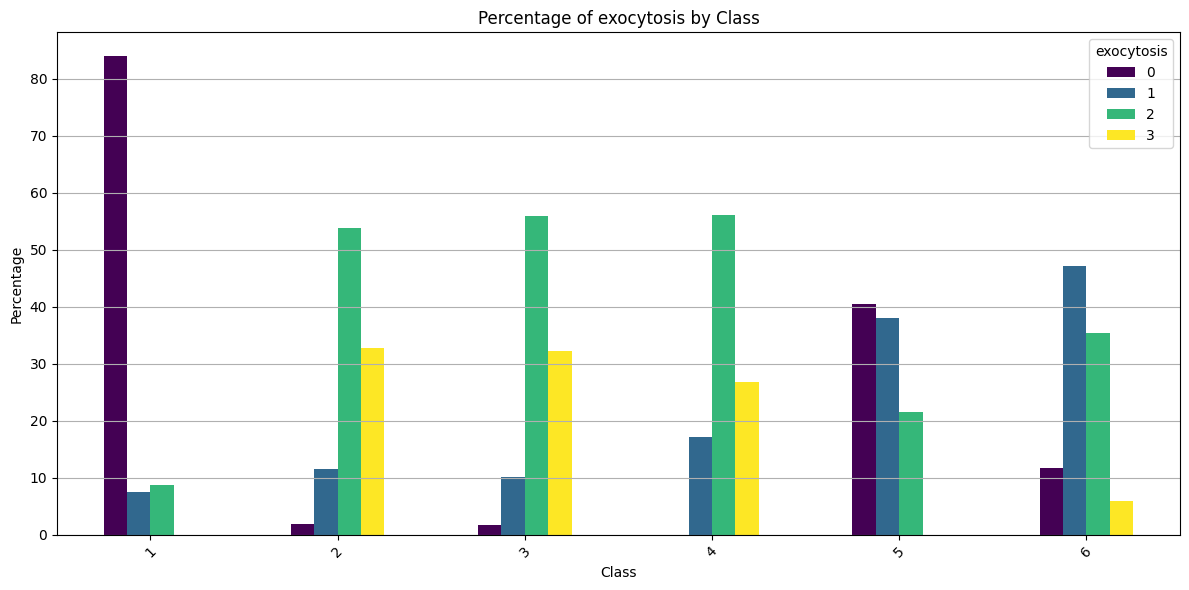

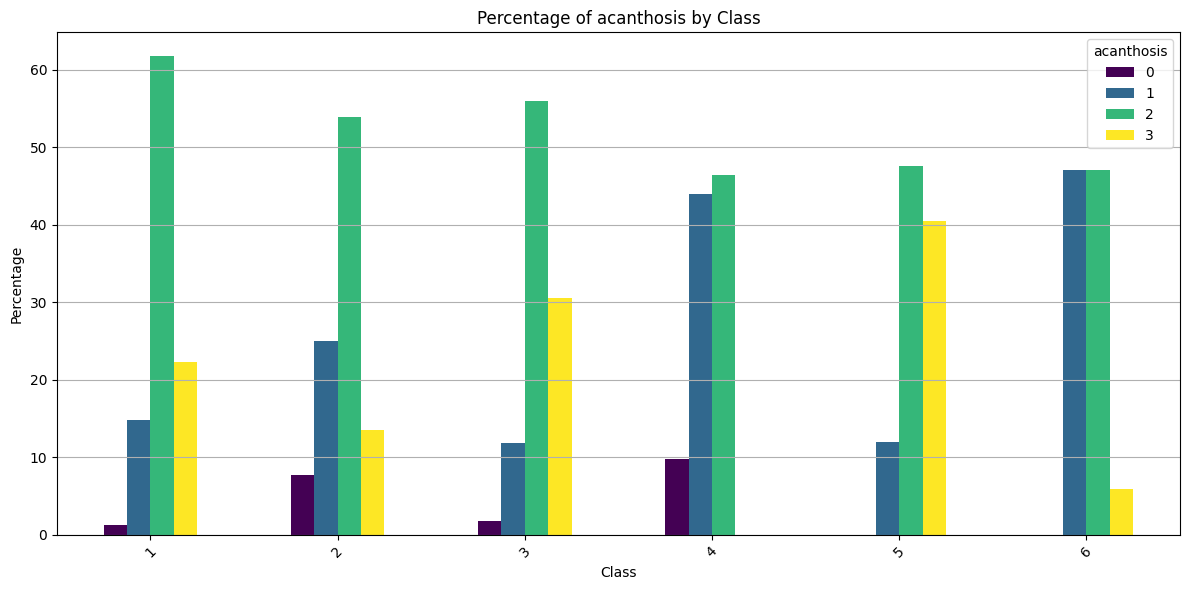

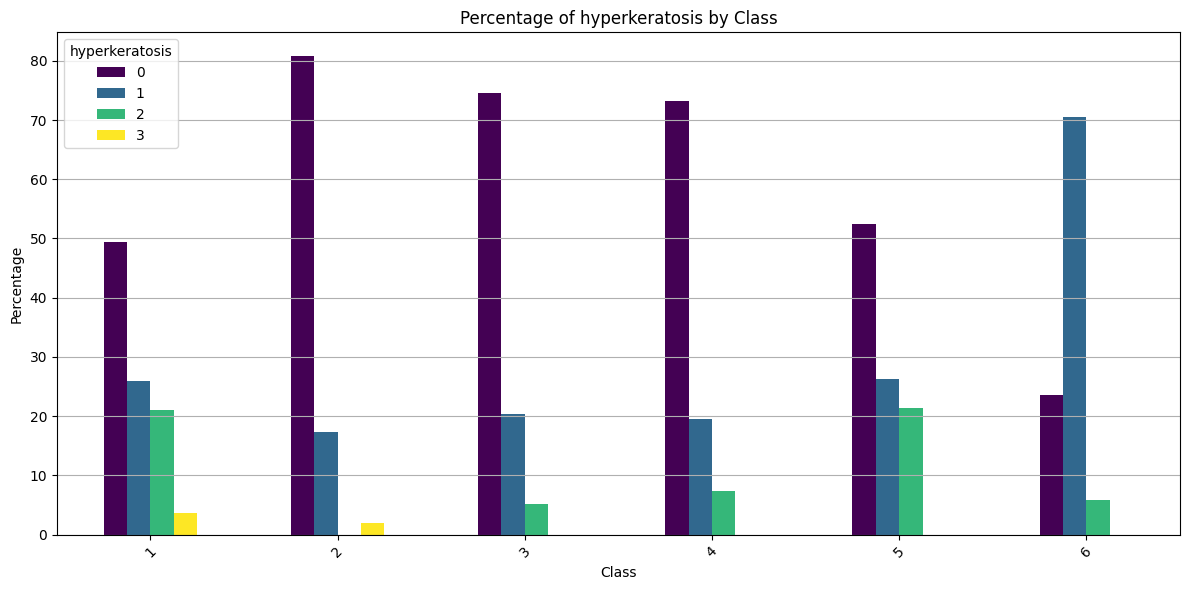

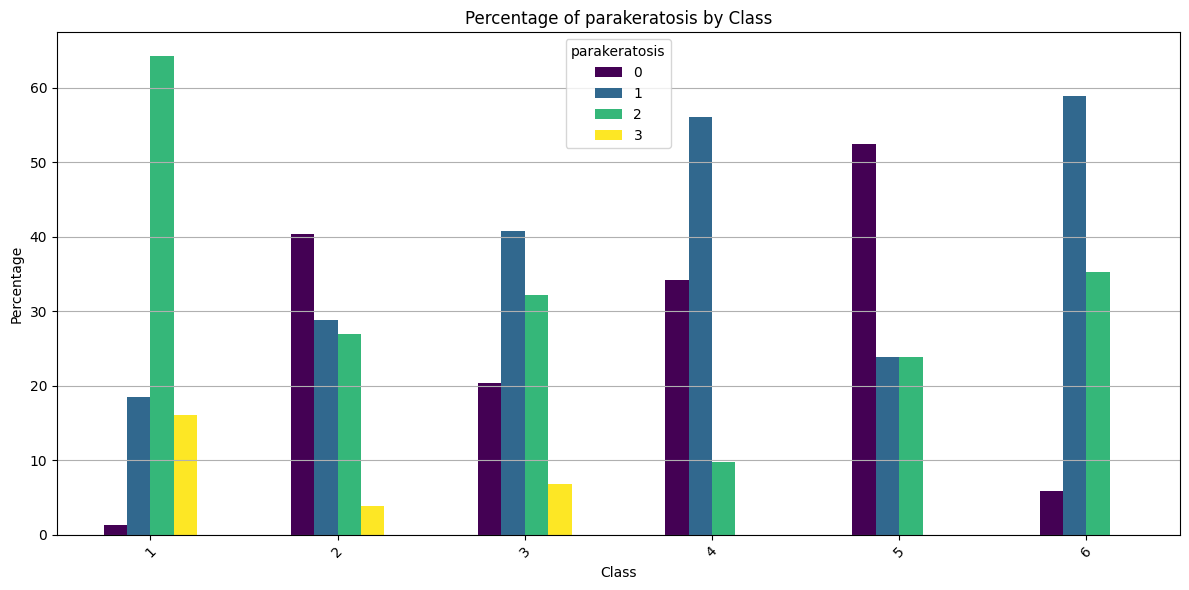

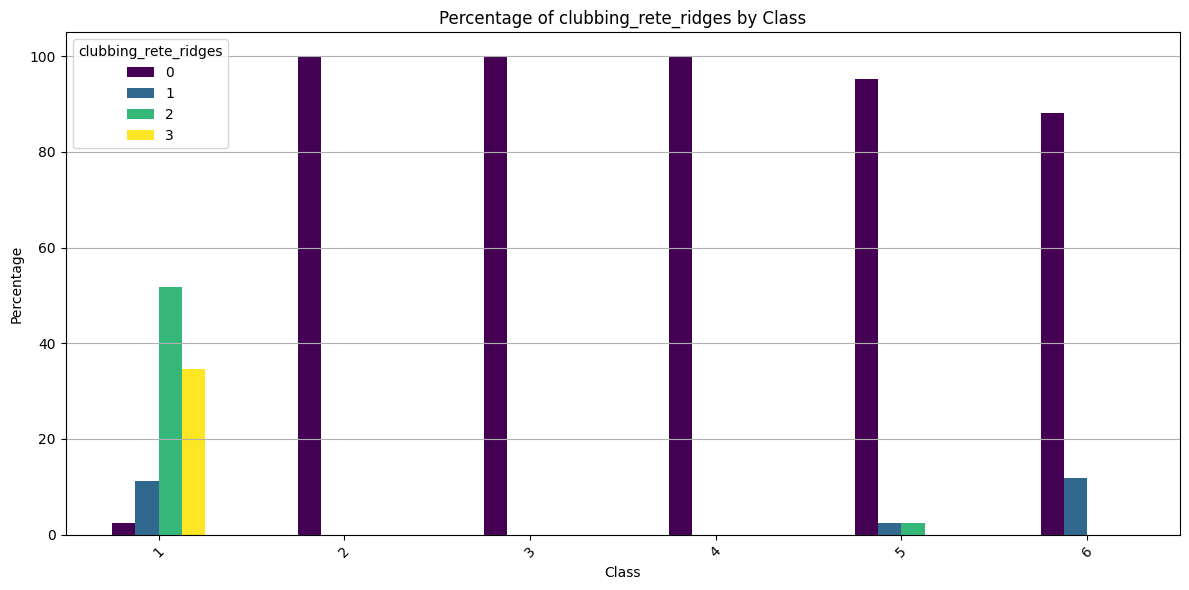

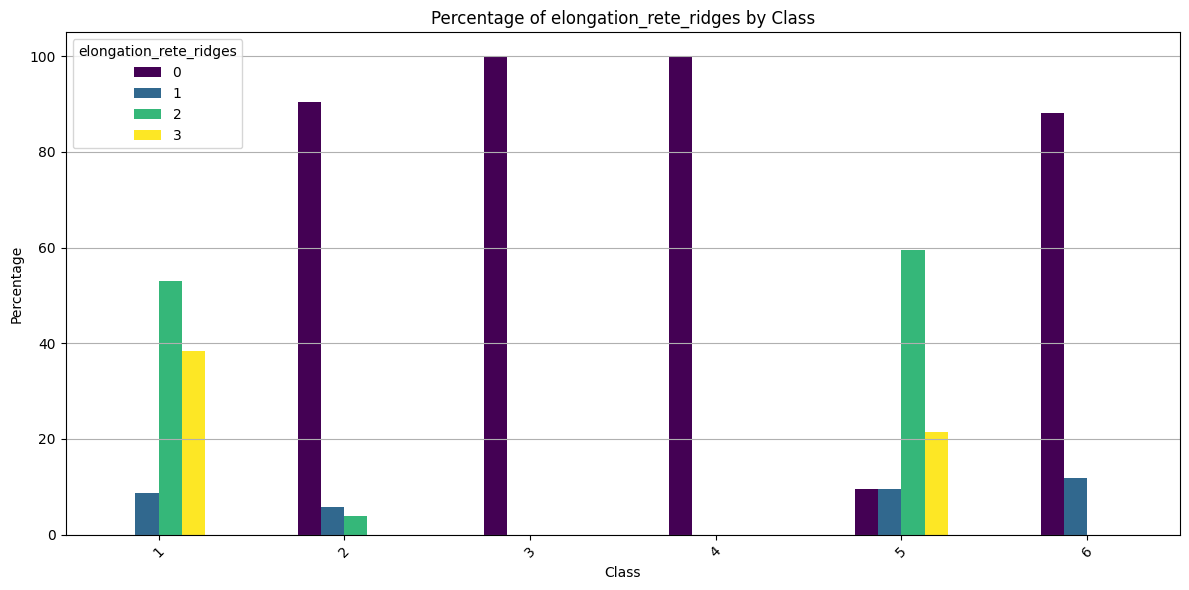

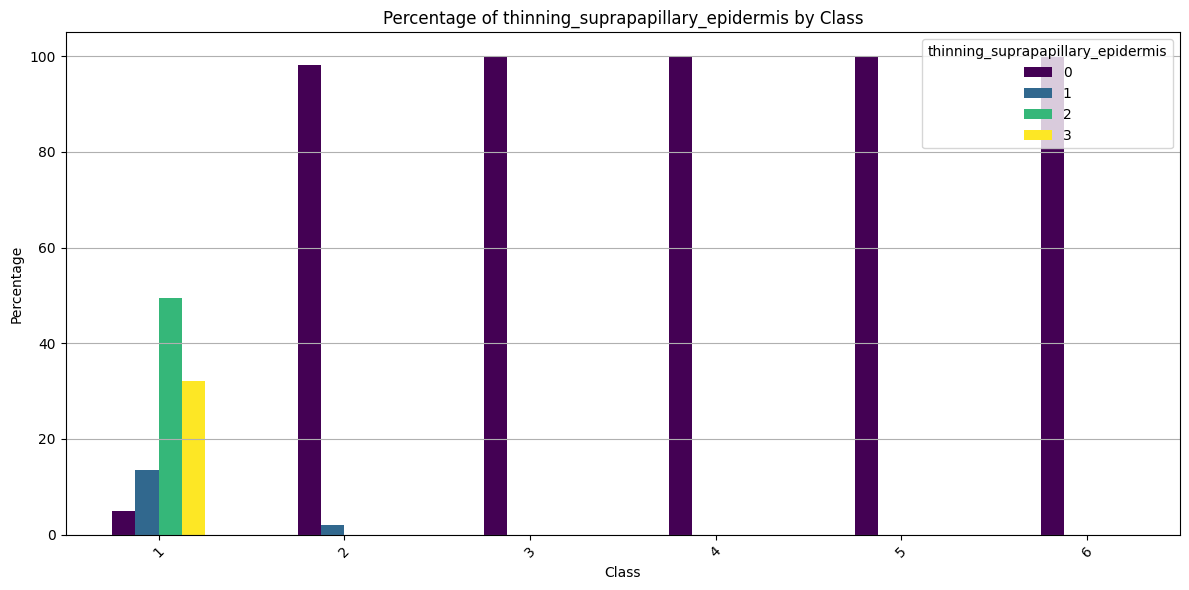

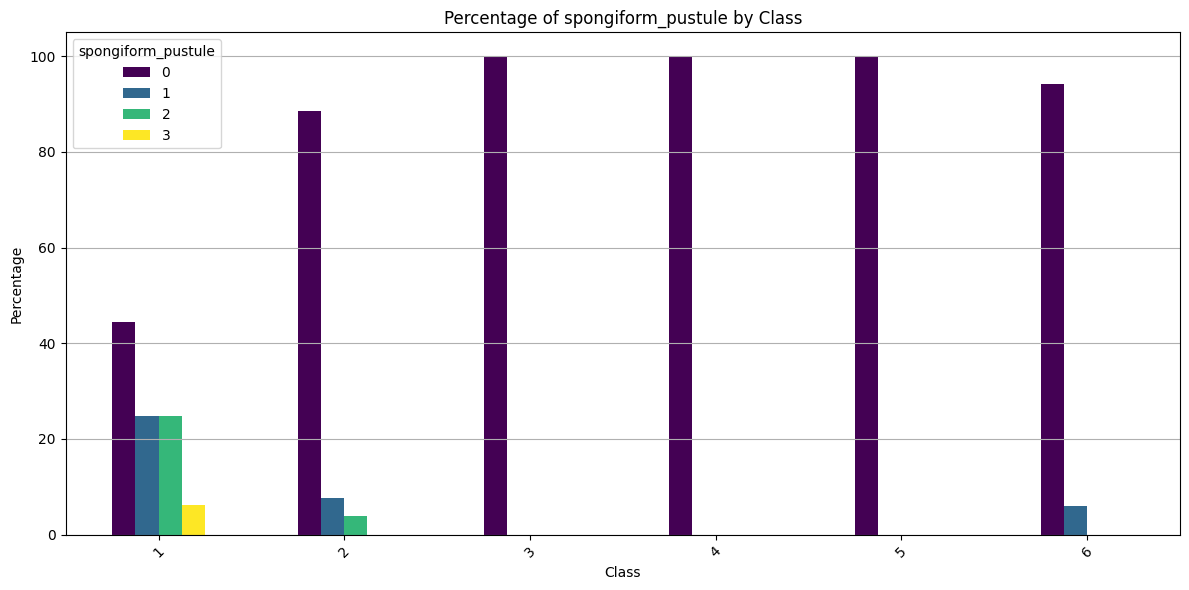

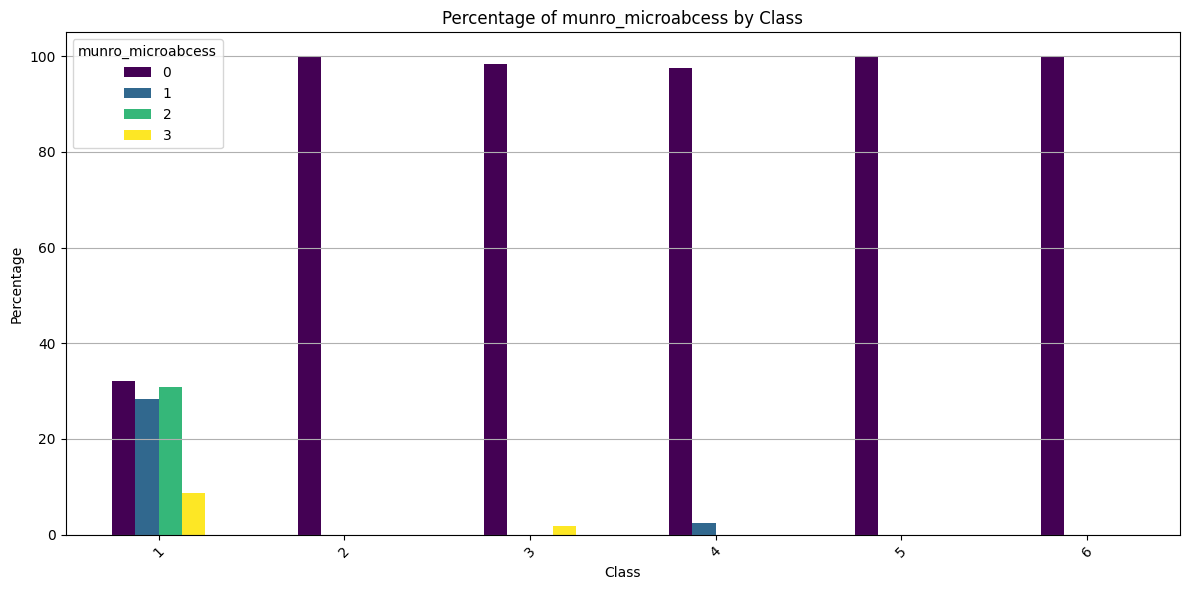

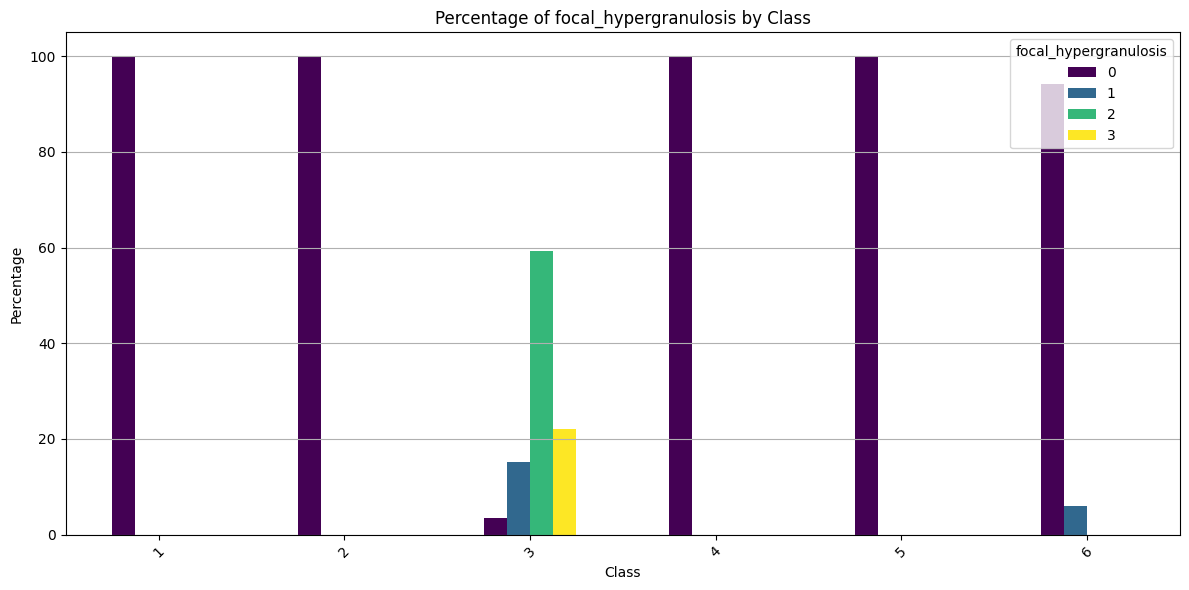

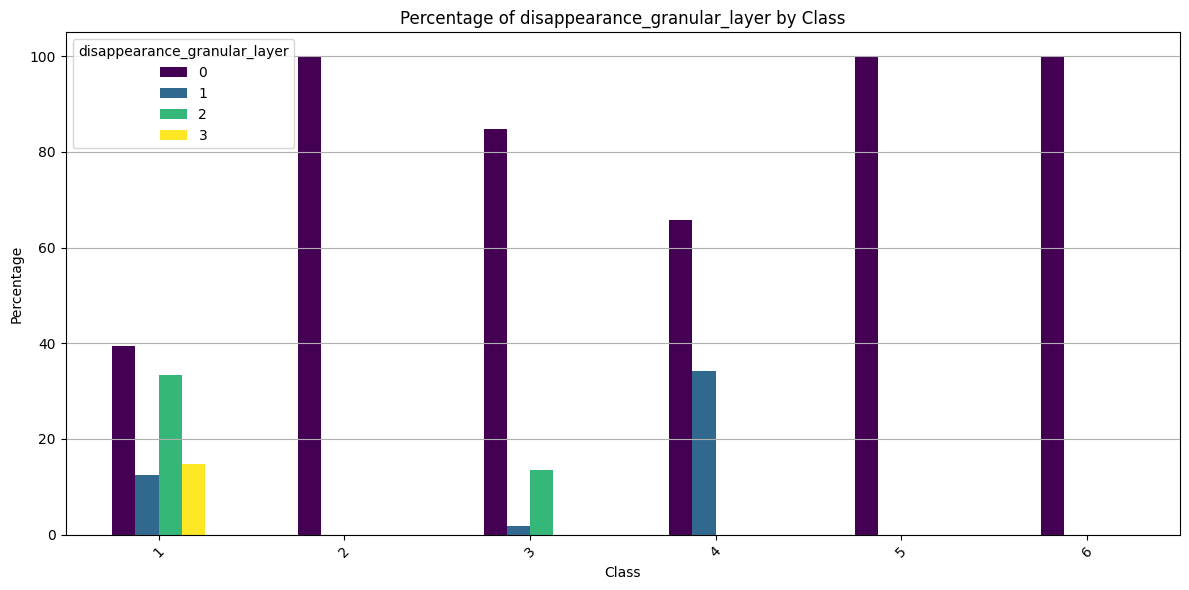

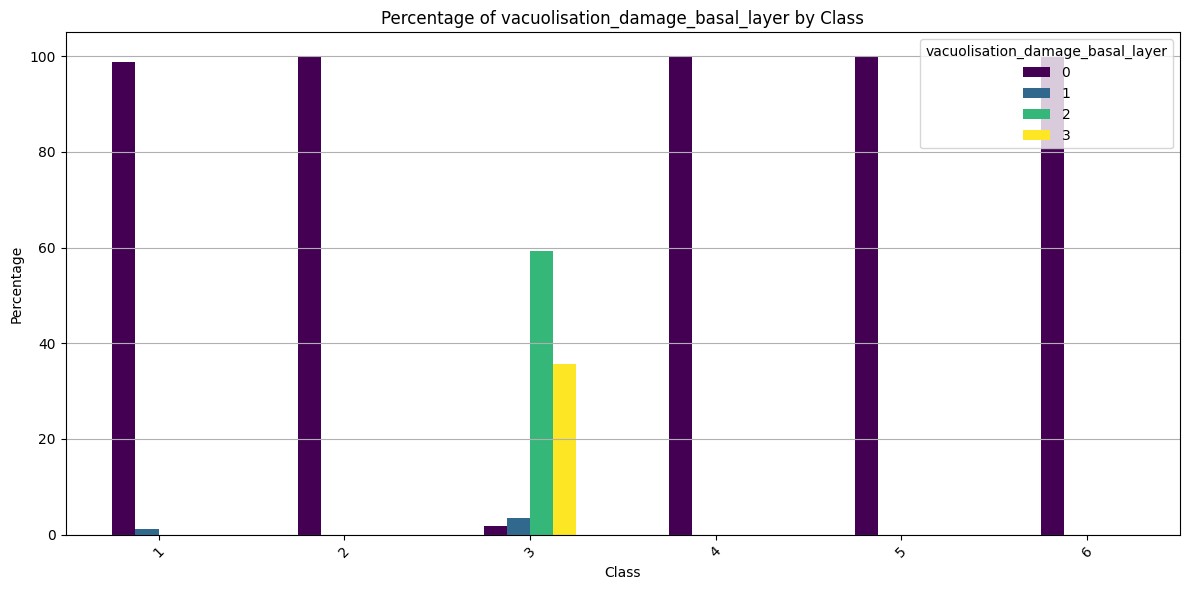

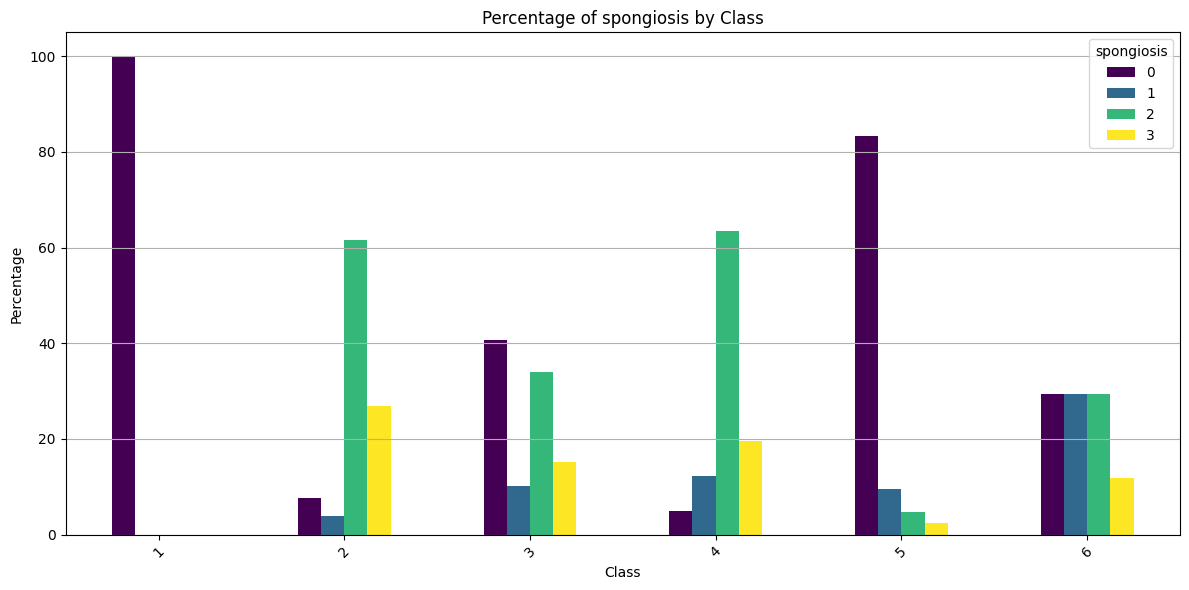

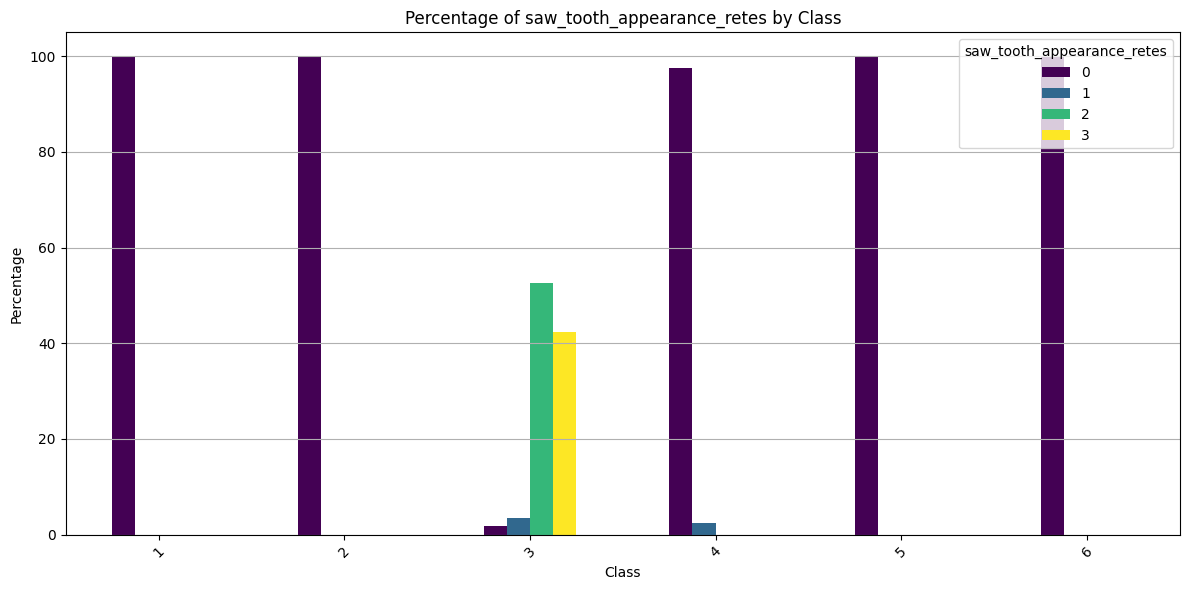

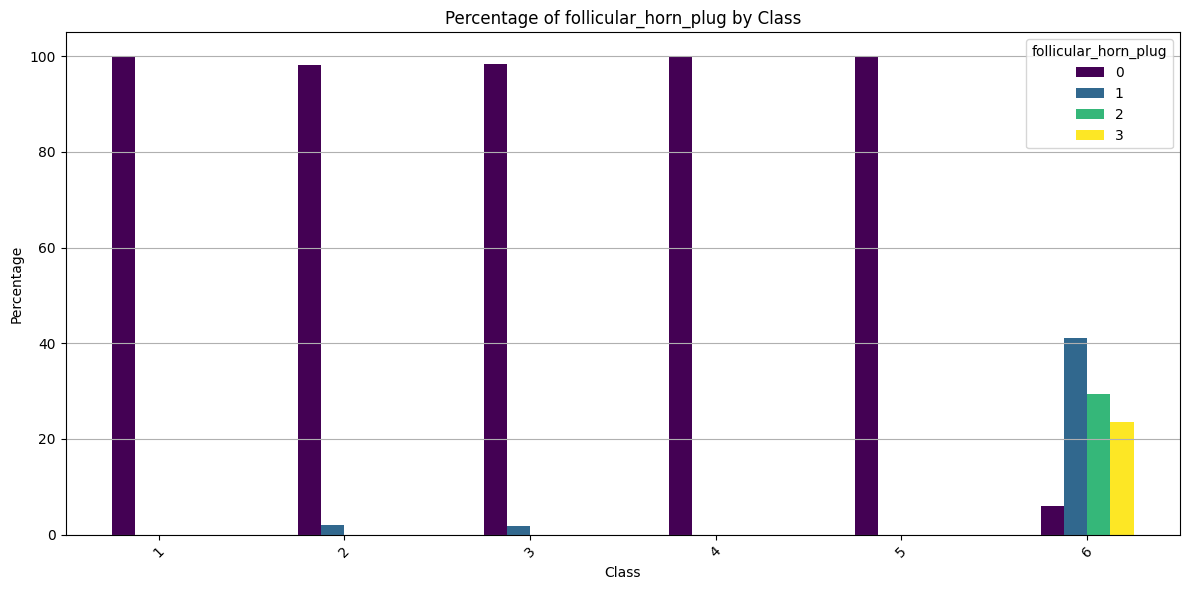

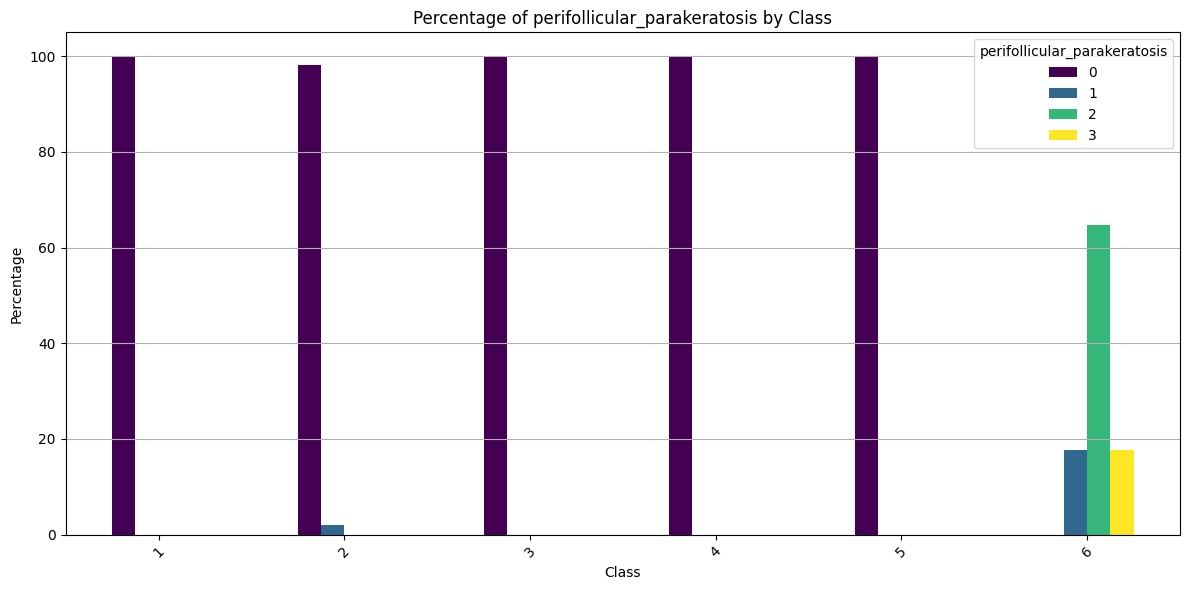

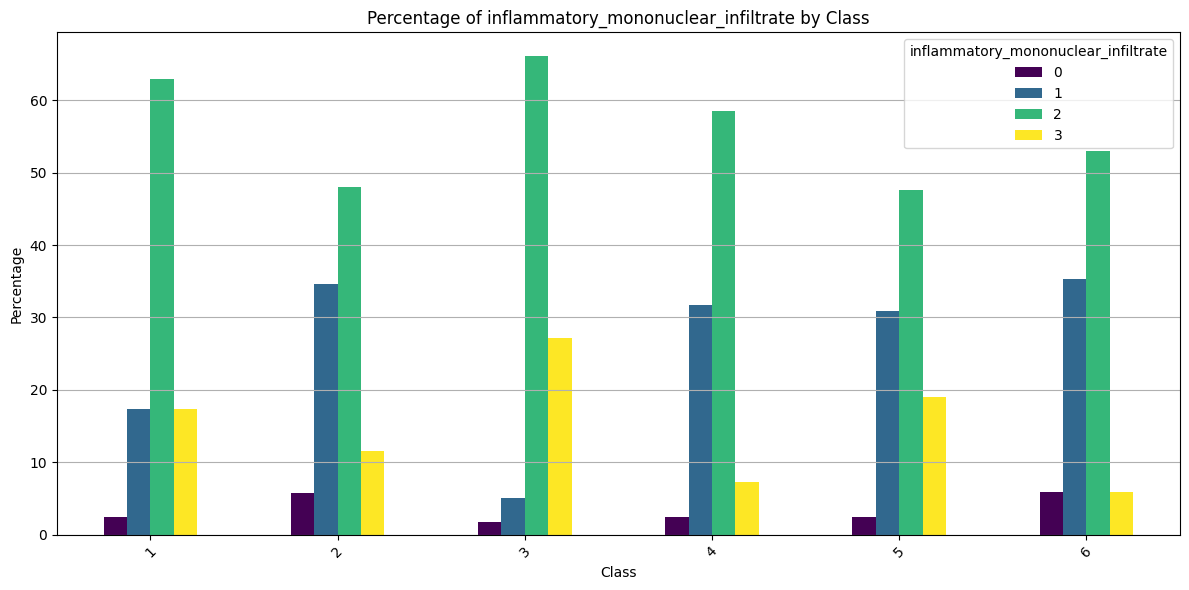

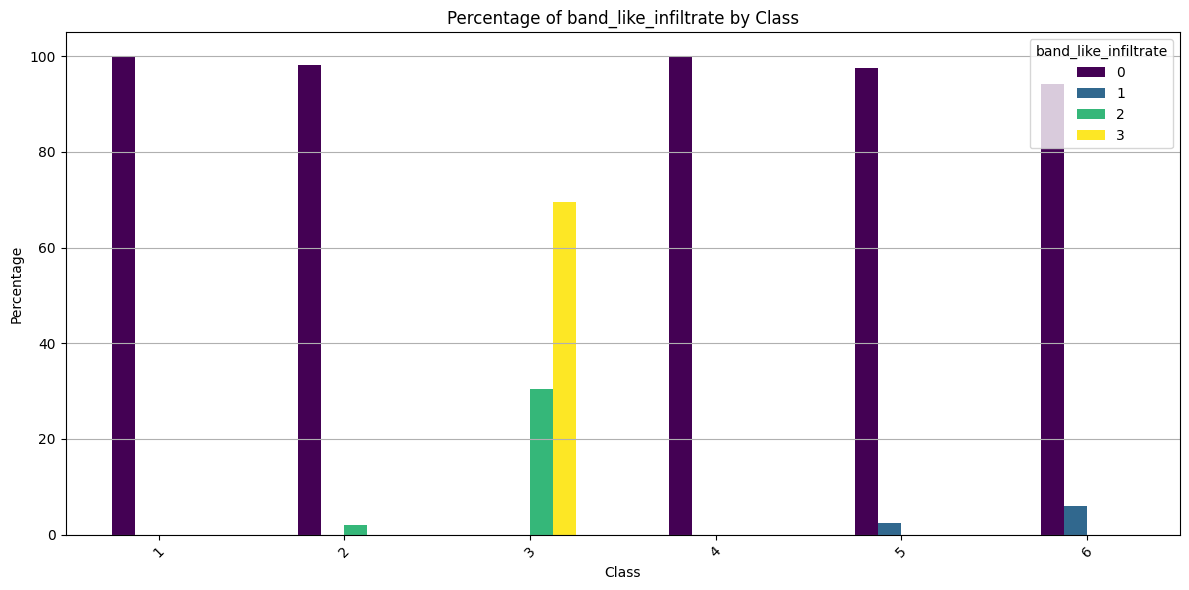

In [22]:
# Combine X_train and y_train for easier grouping
combined_df = X_train.copy()
combined_df['class'] = y_train

# List of categorical features to plot, excluding 'age'
categorical_features = [col for col in X_train.columns if col != 'age']

# Plotting separate clustered bar charts for each categorical feature
for feature in categorical_features:
    # Calculate the percentage of each category within the groups defined by 'class'
    crosstab = pd.crosstab(combined_df['class'], combined_df[feature])
    crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100  # Normalize by rows

    # Plot the clustered bar chart
    ax = crosstab_percentage.plot(kind='bar', figsize=(12, 6), colormap='viridis')
    plt.xlabel('Class')
    plt.ylabel('Percentage')
    plt.title(f'Percentage of {feature} by Class')
    plt.xticks(rotation=45)
    plt.legend(title=feature)
    plt.grid(axis='y')

    # Display the plot
    plt.tight_layout()
    plt.show()


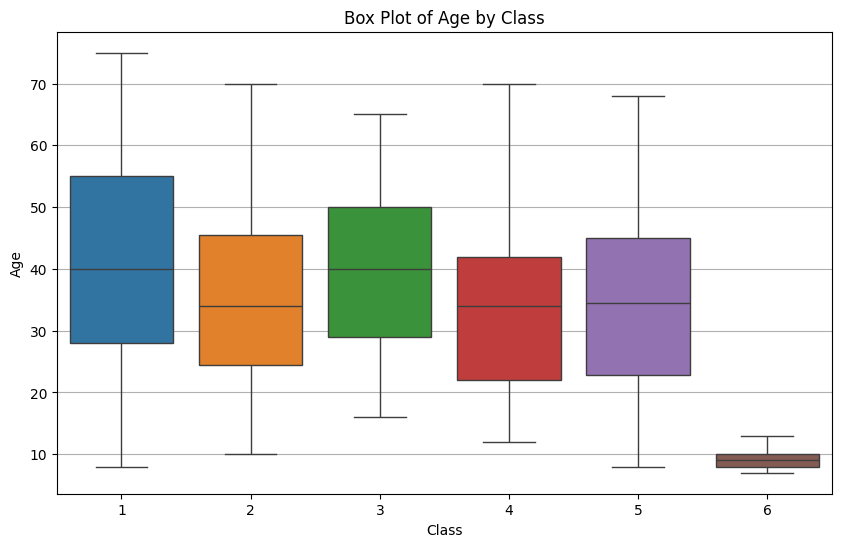

In [23]:
# Combine X_train and y_train into a single DataFrame
combined_df = X_train.copy()
combined_df['class'] = y_train

# Define color mapping with integers
color_mapping = {
    '1': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
    '2': (1.0, 0.4980392156862745, 0.054901960784313725),
    '3': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
    '4': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
    '5': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
    '6': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)
}

# Create the box plot with the consistent color mapping
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='age', data=combined_df, palette=color_mapping)
plt.xlabel('Class')
plt.ylabel('Age')
plt.title('Box Plot of Age by Class')
plt.grid(axis='y')
plt.show()


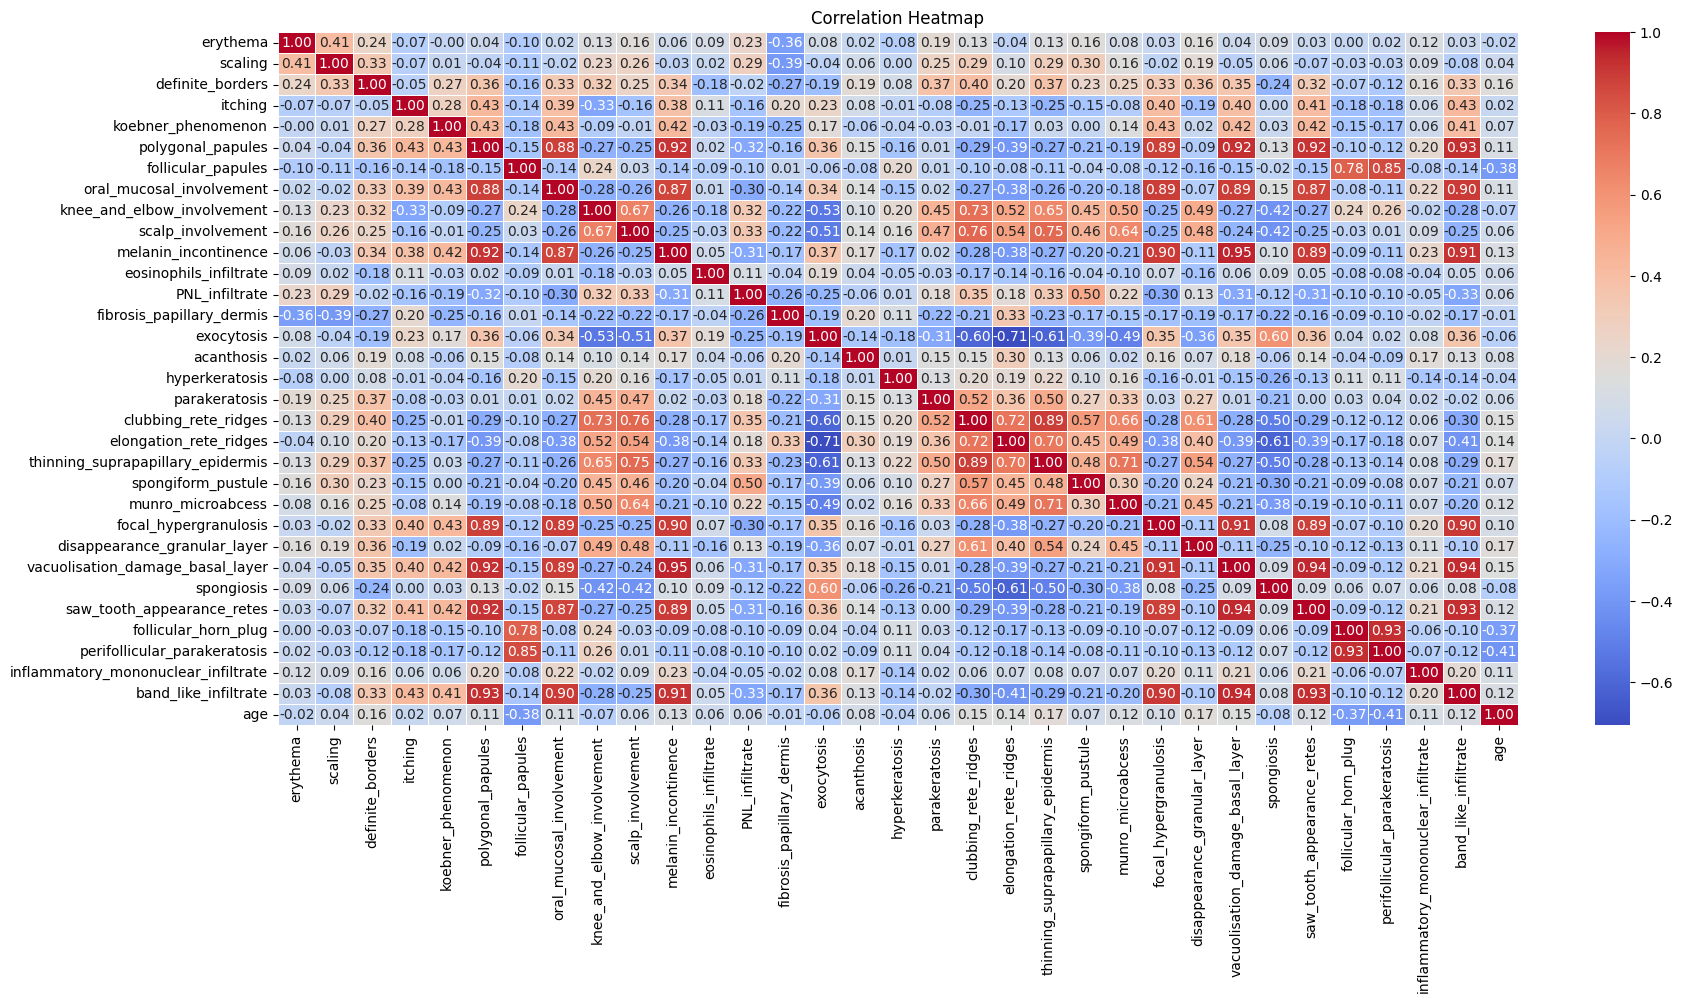

In [24]:
# Convert ordinal features to numeric
ordinal_features = X_train.columns.difference(['family_history'])
X_train[ordinal_features] = X_train[ordinal_features].apply(pd.to_numeric)

X_train_numeric = X_train.drop(columns=['family_history'])
correlation_matrix = X_train_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(20, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **Multicollineaity**

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert ordinal features to numeric
ordinal_features = X_train.columns.difference(['family_history'])
X_train[ordinal_features] = X_train[ordinal_features].apply(pd.to_numeric)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

                                feature        VIF
0                              erythema  13.840555
1                               scaling  12.067053
2                      definite_borders   8.825341
3                               itching   4.302890
4                    koebner_phenomenon   2.398118
5                     polygonal_papules  13.572550
6                    follicular_papules   4.412315
7              oral_mucosal_involvement   9.001588
8            knee_and_elbow_involvement   4.903507
9                     scalp_involvement   4.538060
10                       family_history   1.571547
11                 melanin_incontinence  16.303299
12               eosinophils_infiltrate   1.353087
13                       PNL_infiltrate   2.724906
14            fibrosis_papillary_dermis   3.778801
15                           exocytosis   6.957575
16                           acanthosis  10.799720
17                       hyperkeratosis   1.921288
18                        parak

# **PCA**


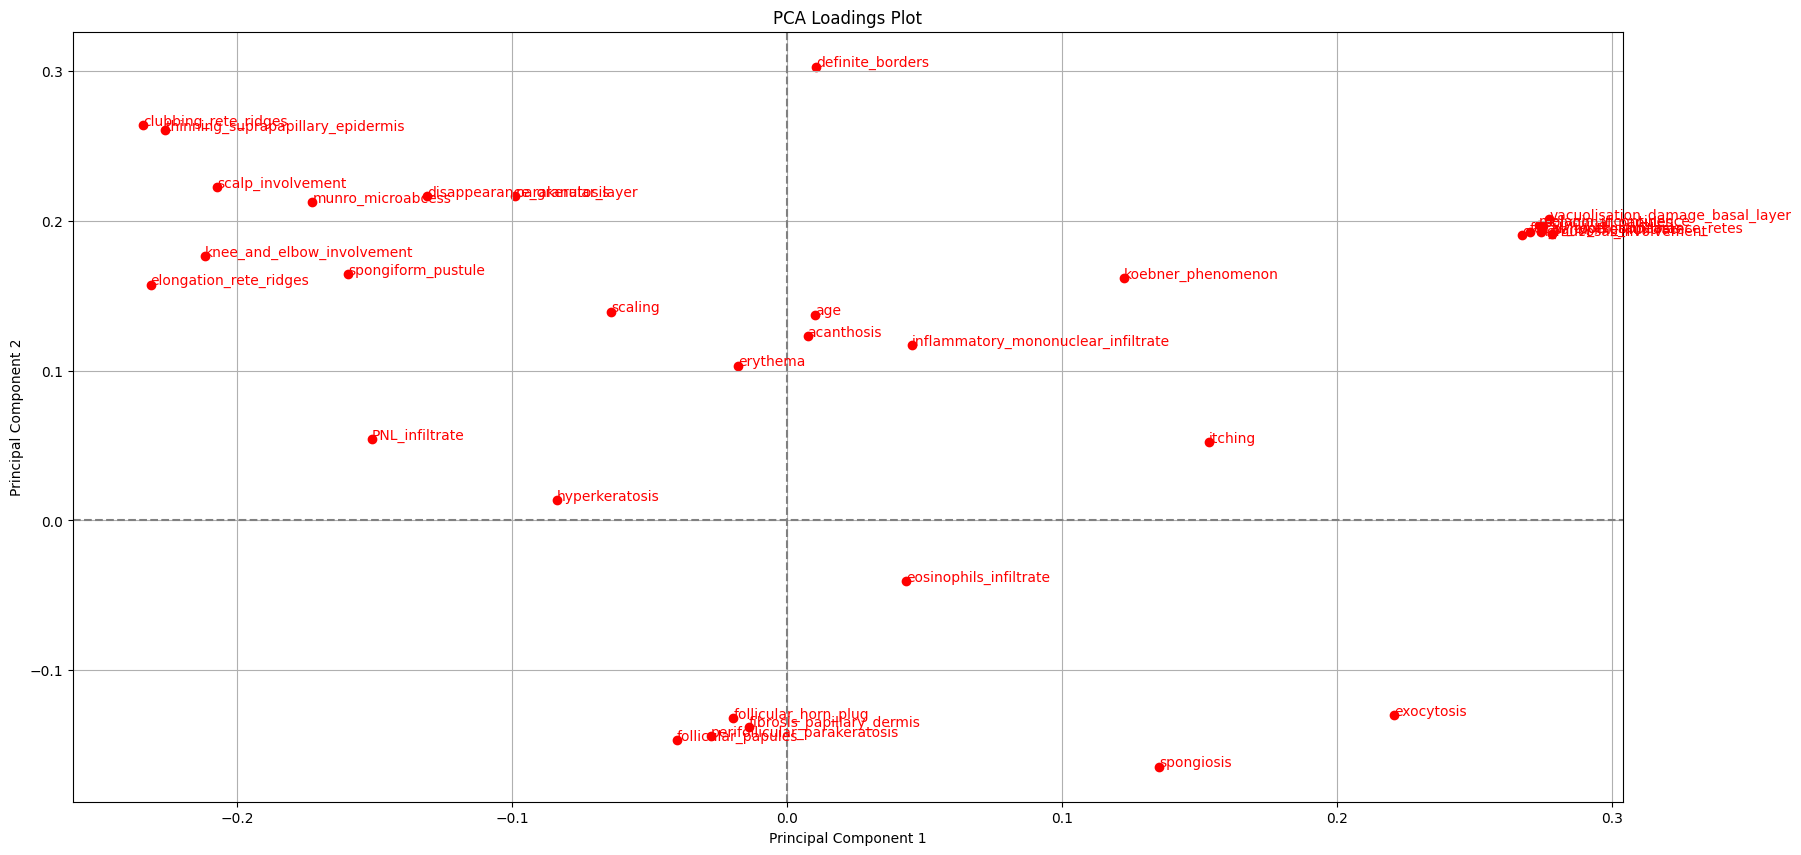

In [26]:
# Remove 'family_history' feature from both training and testing sets
X_train = X_train.drop(columns=['family_history'])
X_test = X_test.drop(columns=['family_history'])

categorical_cols = X_train.select_dtypes(include=['category']).columns
X_train[categorical_cols] = X_train[categorical_cols].astype(int)
X_test[categorical_cols] = X_test[categorical_cols].astype(int)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Create a DataFrame with PCA components and feature names
loadings_df = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(X_train_scaled.shape[1])], index=X_train.columns)

# Plot loadings
plt.figure(figsize=(20, 10))
plt.scatter(loadings_df.iloc[:, 0], loadings_df.iloc[:, 1], color='r')

# Annotate points with feature names
for i in range(len(X_train.columns)):
    plt.text(loadings_df.iloc[i, 0], loadings_df.iloc[i, 1], X_train.columns[i], color='r')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Loadings Plot')
plt.grid()
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.show()

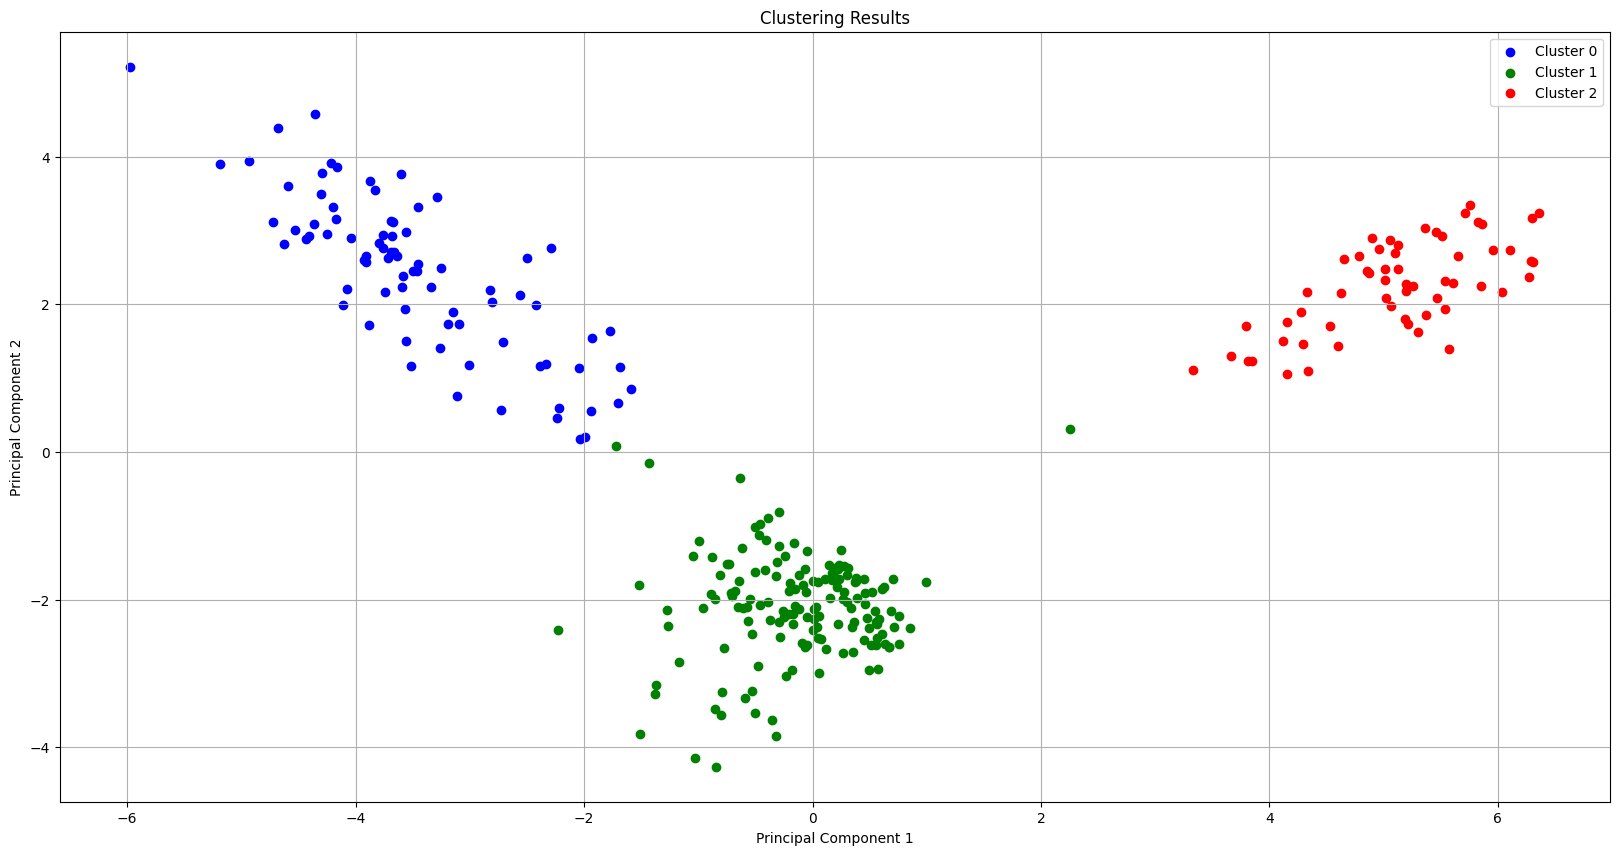

In [27]:
# Apply K-Means Clustering with the optimal number of clusters (assuming optimal_k = 3 from elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_train_pca)

# Add cluster labels to the PCA DataFrame
pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
pca_df['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(20, 10))
colors = ['b', 'g', 'r']
for cluster in range(optimal_k):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', color=colors[cluster])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')
plt.legend()
plt.grid()
plt.show()

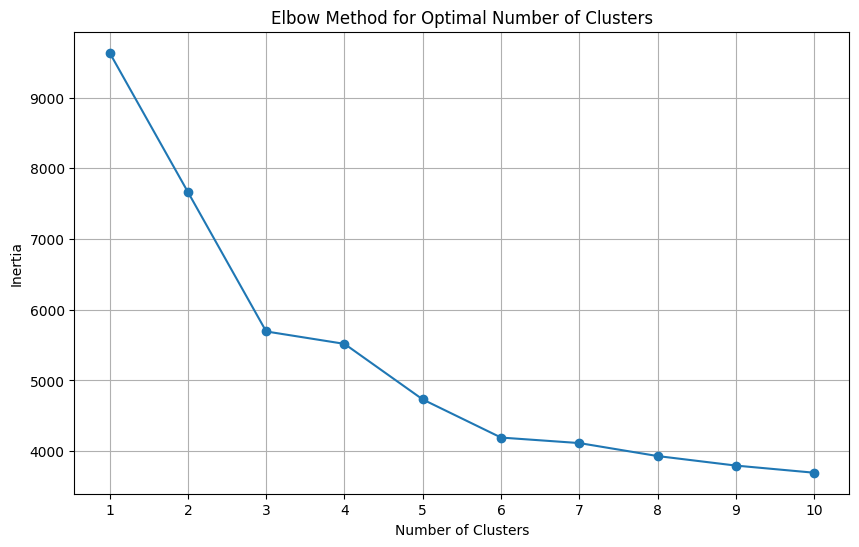

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Assuming X_train_pca is already defined and contains your PCA-transformed data

# Range of cluster numbers to try
cluster_range = range(1, 11)

# List to store the inertia for each number of clusters
inertia = []

# Compute K-Means for each number of clusters and store the inertia
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


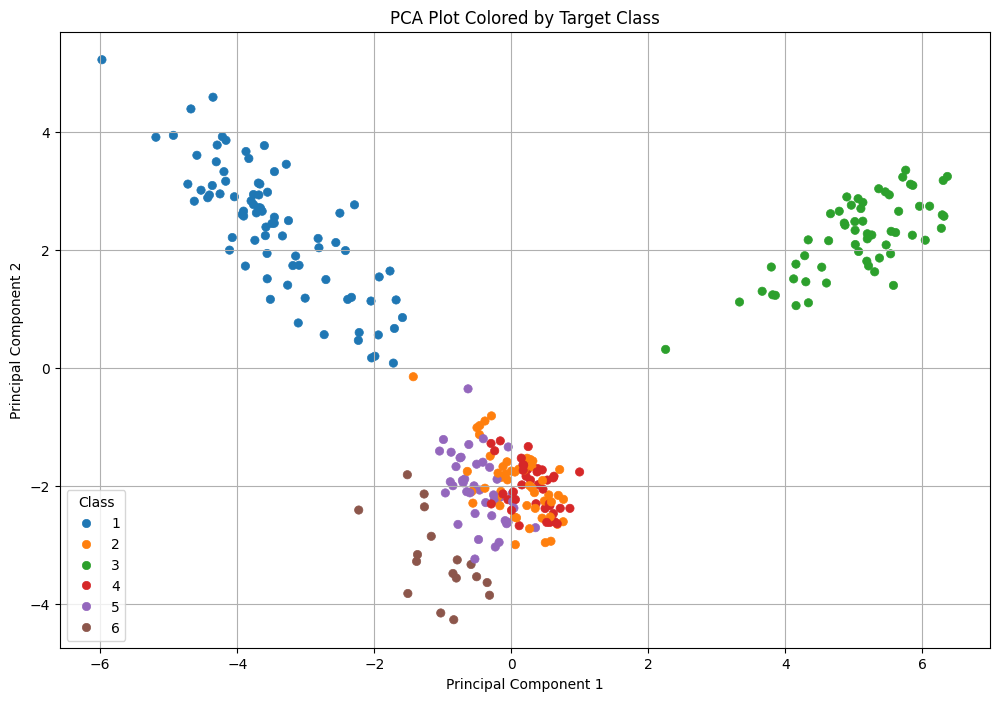

In [29]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Create a DataFrame with PCA components and target labels
pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y_train.values  # Add target labels
# Define a distinct color palette
palette = sns.color_palette('tab10', n_colors=len(y_train.unique()))
# Plot PCA results with colors representing classes
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette=palette, edgecolor=None)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot Colored by Target Class')
plt.legend(title='Class')
plt.grid()
plt.show()

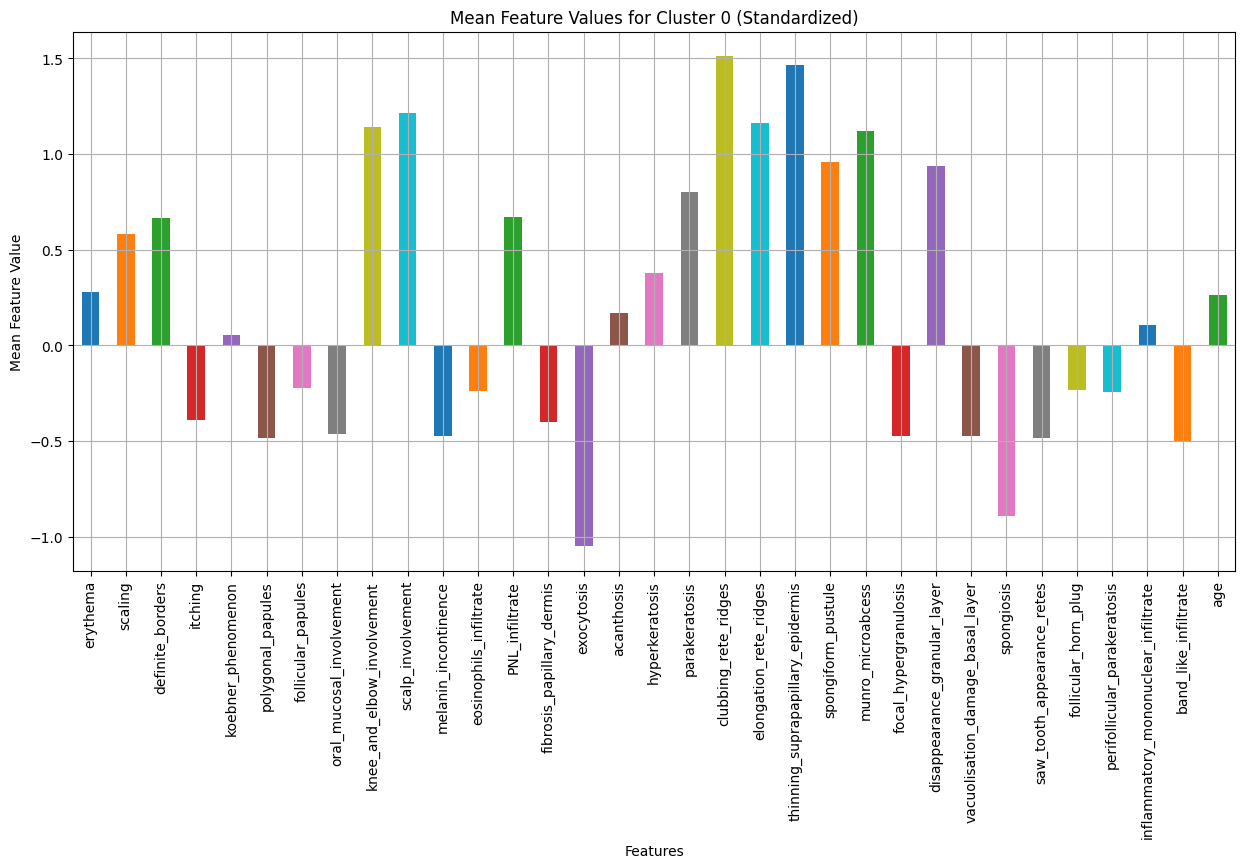

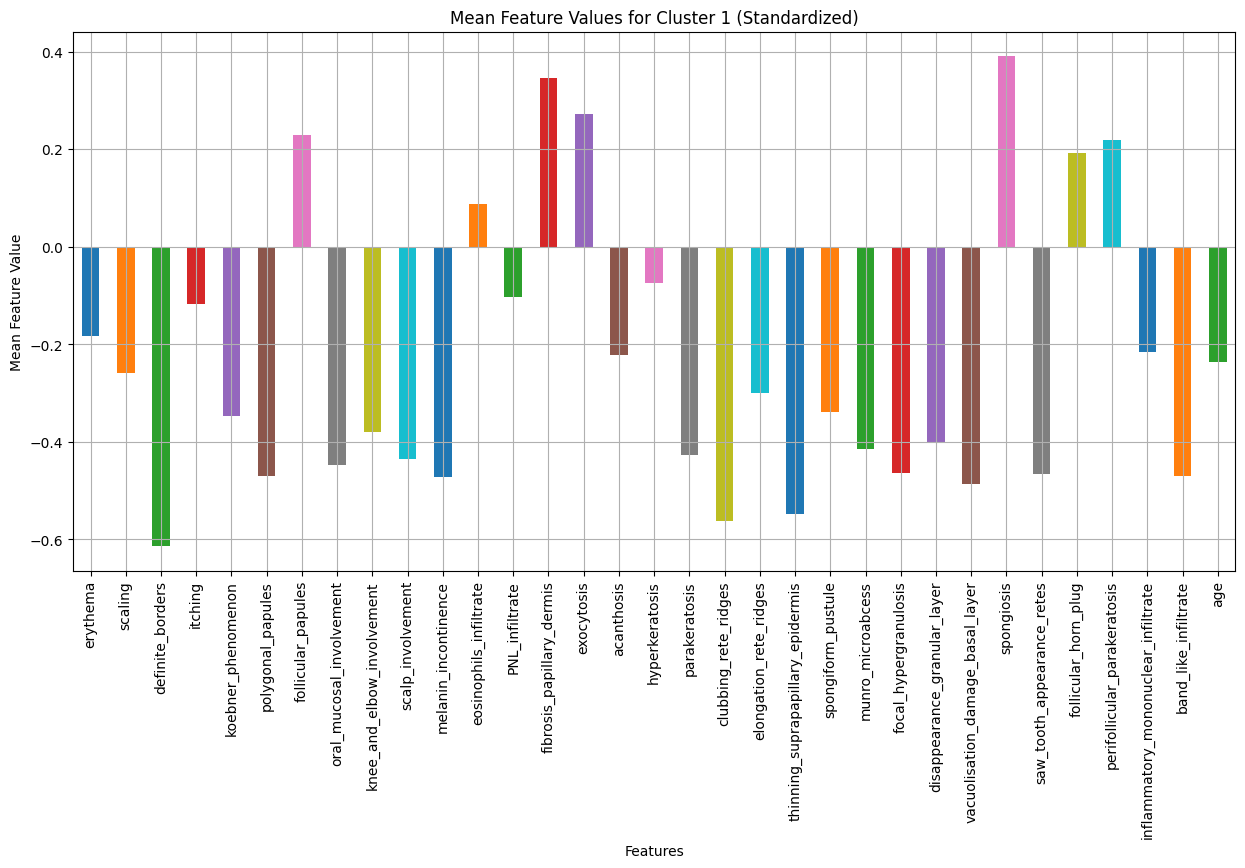

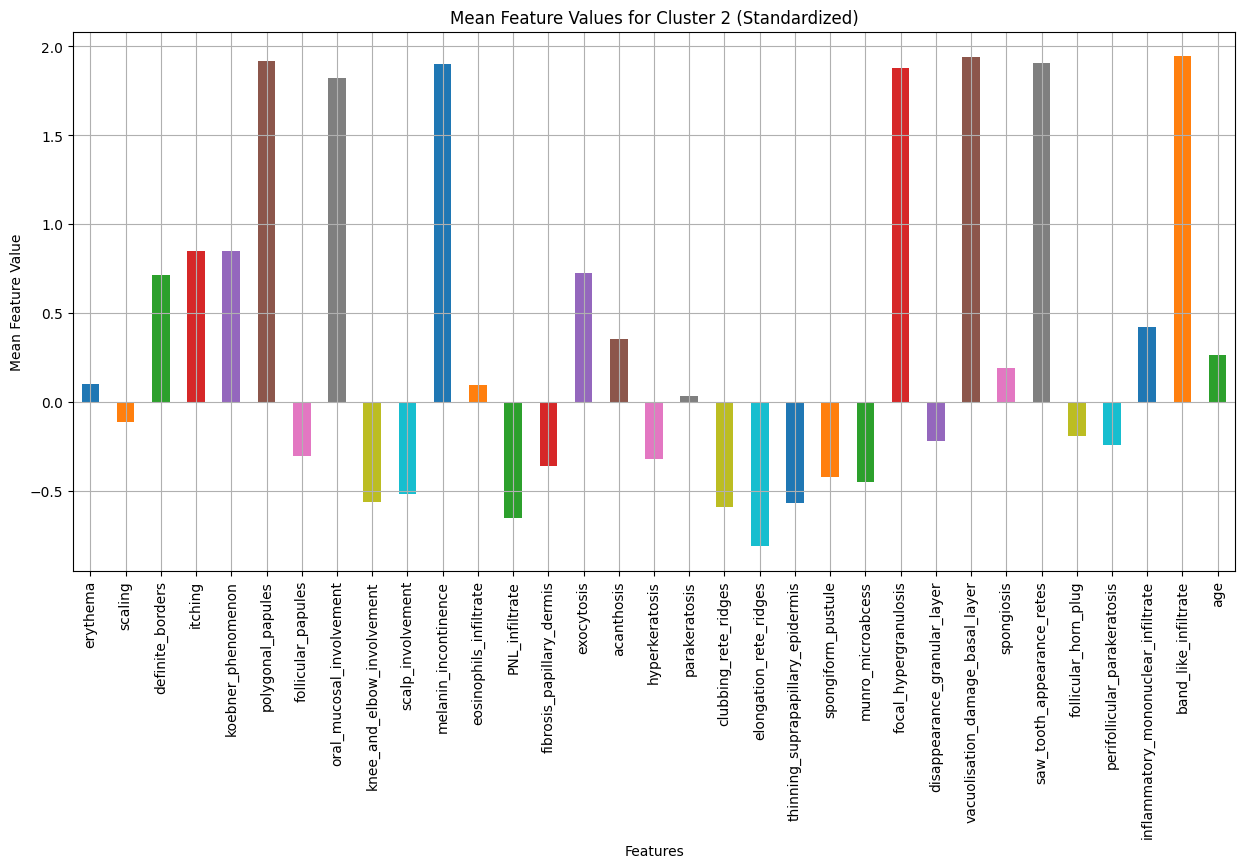

<Figure size 1500x700 with 0 Axes>

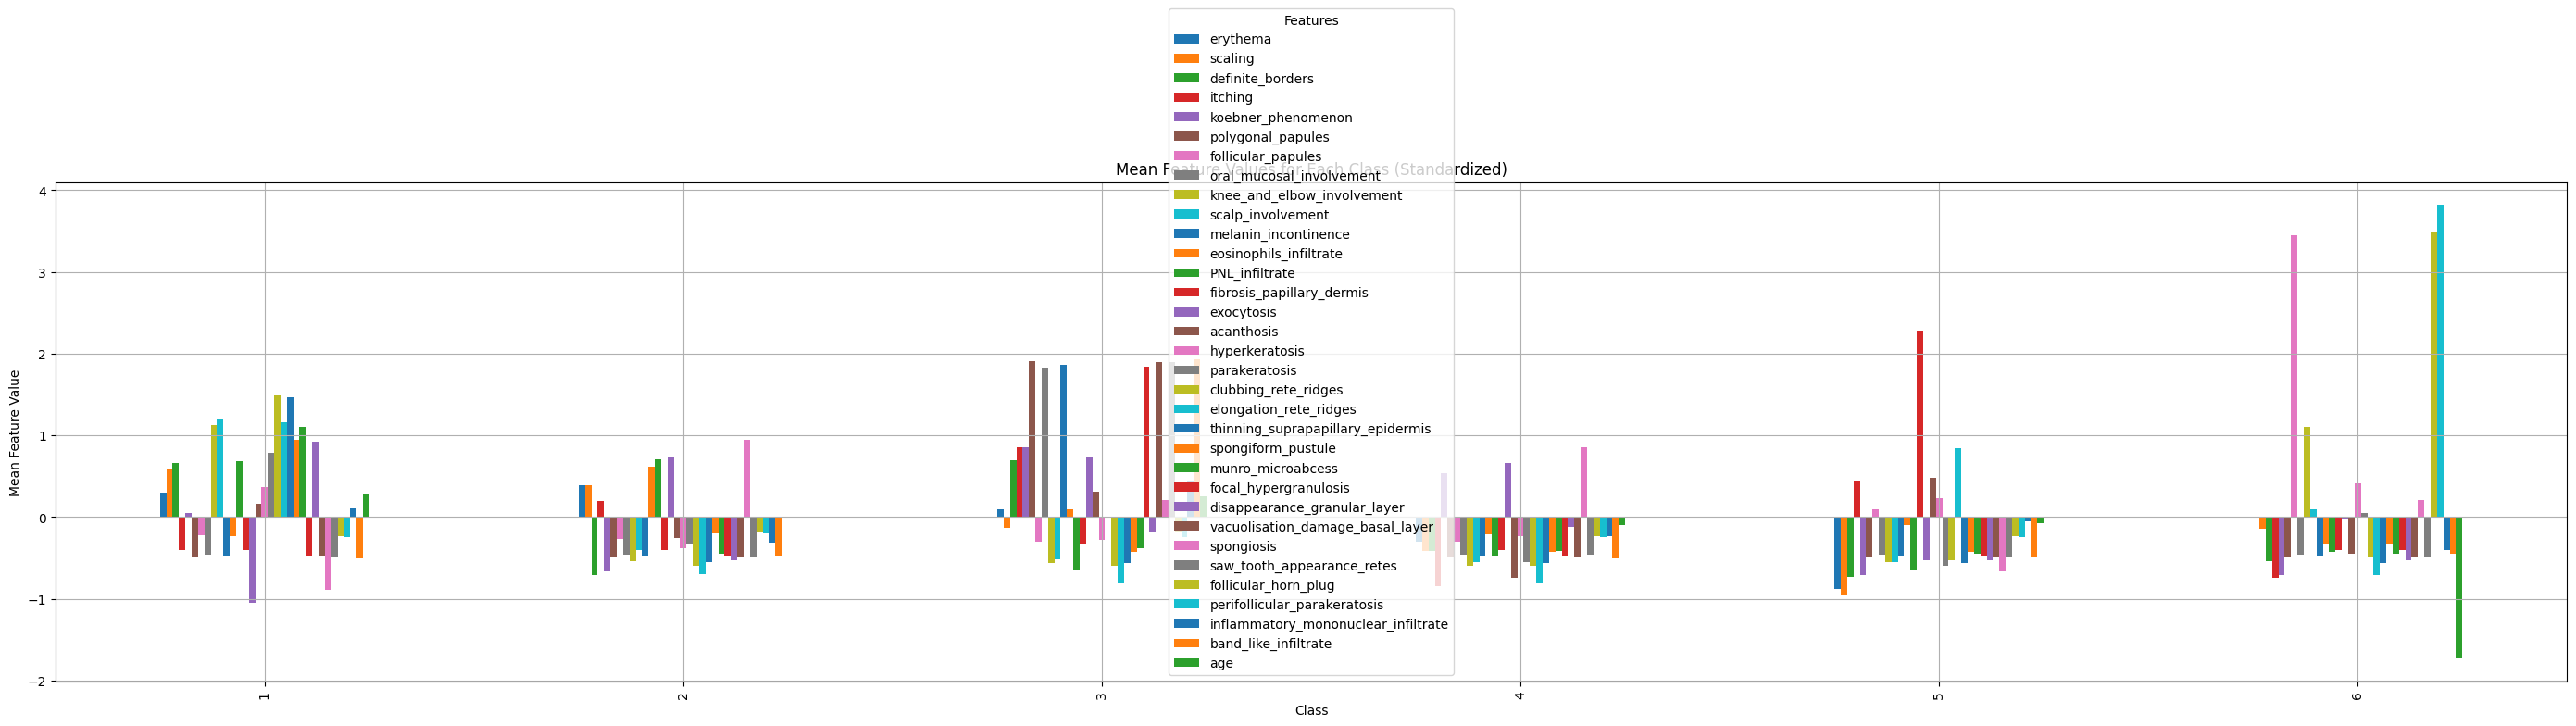

In [30]:
#Analysis of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_train_pca)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Calculate the mean value of each feature for each cluster
df_with_clusters = pd.DataFrame(X_train_scaled, columns=X_train.columns)  # Use scaled data
df_with_clusters['Cluster'] = clusters
cluster_means = df_with_clusters.groupby('Cluster').mean()

# Define a color palette
colors = sns.color_palette("tab10", n_colors=len(X_train.columns))

# Plot the mean values of features for each cluster separately with distinct colors for each feature
for cluster in range(optimal_k):
    plt.figure(figsize=(15, 7))
    cluster_means.iloc[cluster].plot(kind='bar', color=colors)
    plt.title(f'Mean Feature Values for Cluster {cluster} (Standardized)')
    plt.xlabel('Features')
    plt.ylabel('Mean Feature Value')
    plt.grid()
    plt.show()

# Calculate the mean value of each feature for each class
df_with_classes = pd.DataFrame(X_train_scaled, columns=X_train.columns)  # Use scaled data
df_with_classes['Class'] = y_train.values
class_means = df_with_classes.groupby('Class').mean()

# Plot the mean values of features for each class with distinct colors for each feature
plt.figure(figsize=(15, 7))
class_means.plot(kind='bar', color=colors, figsize=(35, 7))
plt.title('Mean Feature Values for Each Class (Standardized)')
plt.xlabel('Class')
plt.ylabel('Mean Feature Value')
plt.legend(title='Features')
plt.grid()
plt.show()

In [31]:
# Print the explained variance ratio for the first and second principal components
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for Principal Component 1:", explained_variance_ratio[0])
print("Explained variance ratio for Principal Component 2:", explained_variance_ratio[1])

Explained variance ratio for Principal Component 1: 0.27323798152161827
Explained variance ratio for Principal Component 2: 0.1689662935533859


Number of outliers (robust): 116


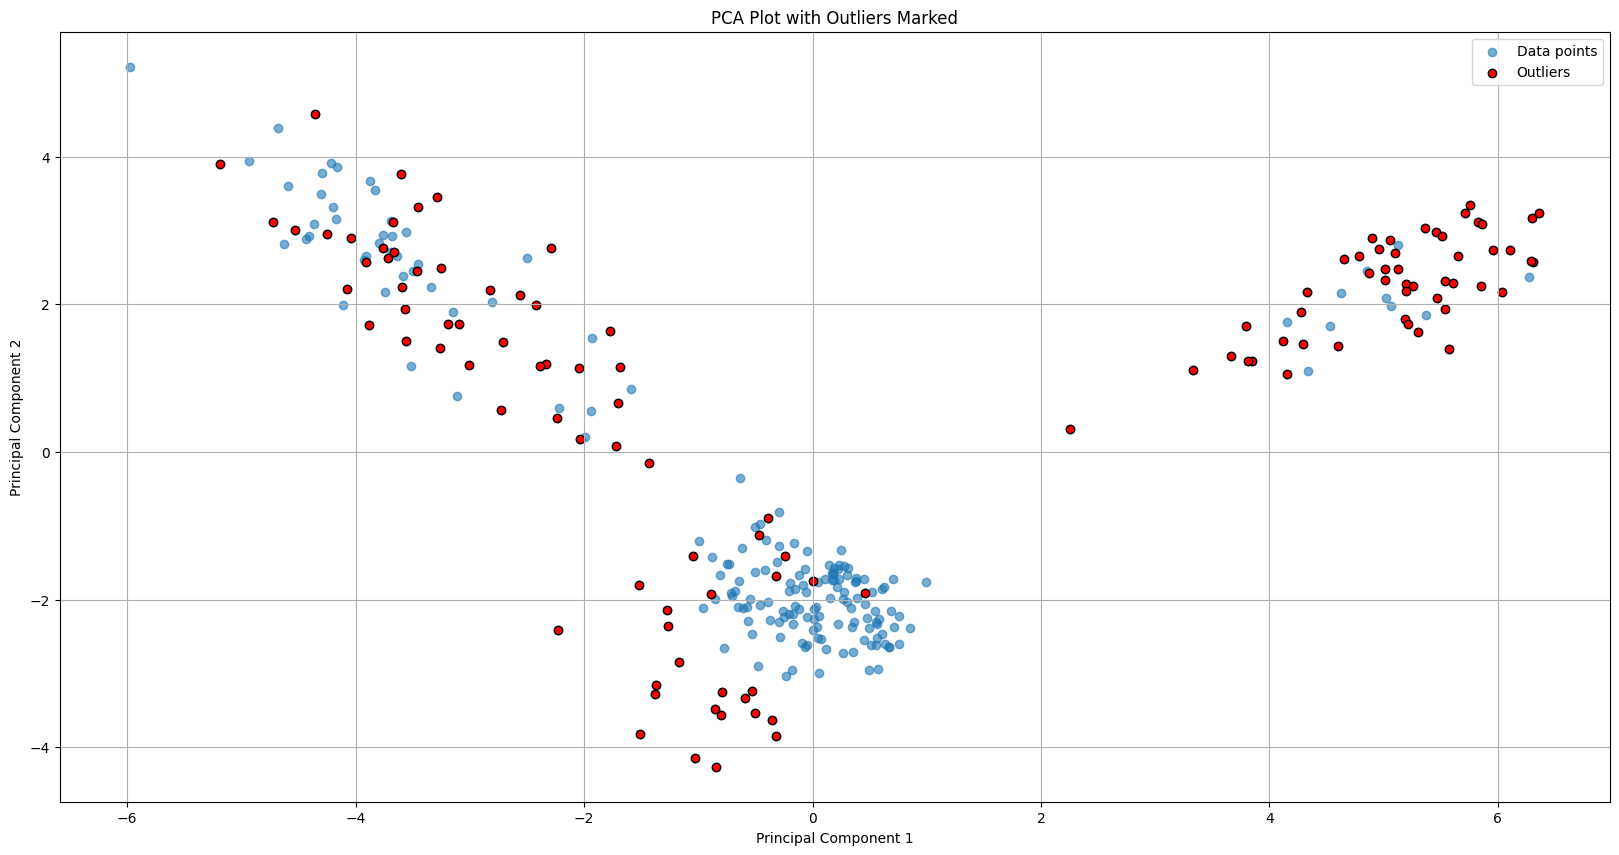

In [32]:
# Find outliers using Mahalanobis distance with robust covariance
robust_cov = MinCovDet().fit(X_train_scaled)
md_robust = robust_cov.mahalanobis(X_train_scaled)
threshold_robust = chi2.ppf((1 - 0.01), df=X_train_scaled.shape[1])
outliers_robust = np.where(md_robust > threshold_robust)[0]

# Count of outliers
num_outliers_robust = len(outliers_robust)
print(f"Number of outliers (robust): {num_outliers_robust}")

# PCA plot with marked outliers
plt.figure(figsize=(20, 10))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], label='Data points', alpha=0.6)
plt.scatter(X_train_pca[outliers_robust, 0], X_train_pca[outliers_robust, 1], color='r', label='Outliers', edgecolors='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Outliers Marked')
plt.legend()
plt.grid()
plt.show()


Number of outliers (Isolation Forest): 3


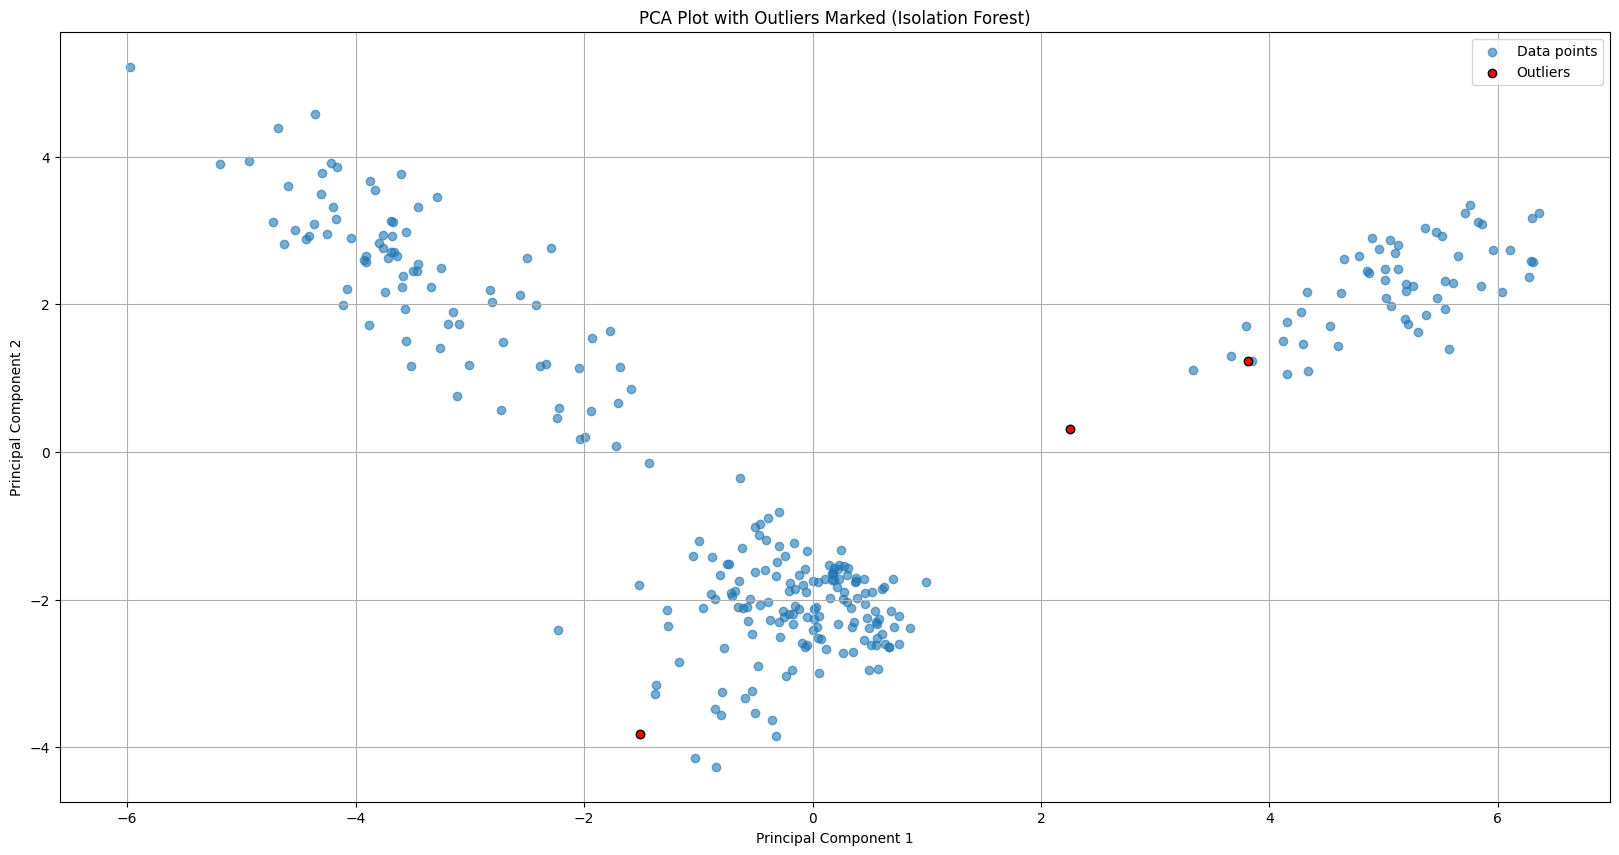

In [33]:
# Use Isolation Forest to find outliers
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outlier_labels = iso_forest.fit_predict(X_train_scaled)
outliers_iso = np.where(outlier_labels == -1)[0]

# Count of outliers using Isolation Forest
num_outliers_iso = len(outliers_iso)
print(f"Number of outliers (Isolation Forest): {num_outliers_iso}")

# PCA plot with marked outliers (Isolation Forest)
plt.figure(figsize=(20, 10))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], label='Data points', alpha=0.6)
plt.scatter(X_train_pca[outliers_iso, 0], X_train_pca[outliers_iso, 1], color='r', label='Outliers', edgecolors='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Outliers Marked (Isolation Forest)')
plt.legend()
plt.grid()
plt.show()
